# Predicting Compressive Strength of Concrete

## Featurization, Model Selection and Tuning Tutorial

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

%matplotlib inline

In [4]:
from sklearn.preprocessing import StandardScaler
#Import Skylearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# Import Linear Regression, Ridge and Lasso machine learning library
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
# Import support vector regressor machine learning library
from sklearn.svm import SVR
# Import the metrics
from sklearn import metrics
# Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor
# Import stats from scipy
from scipy import stats
# Import zscore for scaling
from scipy.stats import zscore
# Importing the metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Importing the K fold
from sklearn.model_selection import KFold
# Importing the cross validation score
from sklearn.model_selection import cross_val_score
# Importing the preprocessing library
from sklearn import preprocessing
# Importing the Polynomial features
from sklearn.preprocessing import PolynomialFeatures
# Importing kmeans clustering library
from sklearn.cluster import KMeans
from sklearn.utils import resample

In [5]:
pip install pyforest

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
from pyforest import*
lazy_imports()

['import plotly.graph_objs as go',
 'import plotly.express as px',
 'from sklearn.ensemble import RandomForestRegressor',
 'from sklearn.linear_model import LassoCV',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from dask import dataframe as dd',
 'from fbprophet import Prophet',
 'import statsmodels.api as sm',
 'import altair as alt',
 'import tensorflow as tf',
 'from pathlib import Path',
 'import os',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn.model_selection import GridSearchCV',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import lightgbm as lgb',
 'from sklearn.linear_model import ElasticNetCV',
 'import xgboost as xgb',
 'from sklearn.model_selection import cross_val_score',
 'import plotly as py',
 'import fastai',
 'from sklearn.linear_model import ElasticNet',
 'from statsmodels.tsa.arima_model import ARIMA',
 'import fbprophet',
 'import statistics',
 'from scipy import signal as sg',
 'import pydot',
 'fro

In [7]:
df = pd.read_csv("C:/Users/lucar/Documents/My Documents/03 Uni/02 Bath/02 AIML/Concrete Project/Code/Concrete_Data_1.csv")

<IPython.core.display.Javascript object>

In [8]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


###### Observation
###### 1. It shows that there are eight independent variables and one dependent variable - compressive strength.
###### 2. All the records are numeric

In [9]:
df = df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
                        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'slag',
                        'Fly Ash (component 3)(kg in a m^3 mixture)':'ash',
                        'Water (component 4)(kg in a m^3 mixture)':'water',
                        "Superplasticizer (component 5)(kg in a m^3 mixture)":'superplastic',
                        'Coarse Aggregate (component 6)(kg in a m^3 mixture)':'coarseagg',
                        'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fineagg',
                        'Age (day)':'age',
                        'Concrete compressive strength(MPa, megapascals)':'strength'
})

In [10]:
df.columns = ['cement', 'slag', 'ash', 'water', 'superplasticizer', 'coarseagg', 'fineagg', 'age', 'strength']

In [11]:
df.head()

,cement,slag,ash,water,superplasticizer,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [12]:
df.dtypes

cement              float64
slag                float64
ash                 float64
water               float64
superplasticizer    float64
coarseagg           float64
fineagg             float64
age                   int64
strength            float64
dtype: object

In [13]:
df.shape

(1030, 9)

In [14]:
#checking for missing values
df.isnull().sum()

cement              0
slag                0
ash                 0
water               0
superplasticizer    0
coarseagg           0
fineagg             0
age                 0
strength            0
dtype: int64

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


## Exploratroy Data Analysis

#### Cement

In [16]:
#Quartiles
from scipy import stats

cement_Q1=df['cement'].quantile(q=0.25)
cement_Q3=df['cement'].quantile(q=0.75)

print('1st Quartile (cement_Q1) is: ',cement_Q1)
print('3rd Quartile (cement_Q3) is: ',cement_Q3)
print('Interquartile range (cement_IQR) is ', stats.iqr(df['cement']))

1st Quartile (cement_Q1) is:  192.375
3rd Quartile (cement_Q3) is:  350.0
Interquartile range (cement_IQR) is  157.625


In [17]:
#Outlier detection from Interquartile range (IQR) in original data


L_outliers=cement_Q1-1.5*(cement_Q3-cement_Q1)
U_outliers=cement_Q3+1.5*(cement_Q3-cement_Q1)
print('Lower outlier limit in cement: ',L_outliers)
print('Upper outlier limit in cement: ',U_outliers)

Lower outlier limit in cement:  -44.0625
Upper outlier limit in cement:  586.4375


In [18]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in cement upper: ', df[df['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower: ', df[df['cement']<-44.0625]['cement'].count())

# print('% of Outlier in cement upper: ', round(df[df['cement']>586.4375]['cement'].count()*100/len(df)))
# print('% of Outlier in cement lower: ', round(df[df['cement']<-44.0625]['cement'].count()*100/len(df)))

Number of outliers in cement upper:  0
Number of outliers in cement lower:  0


<IPython.core.display.Javascript object>

<Axes: xlabel='cement'>

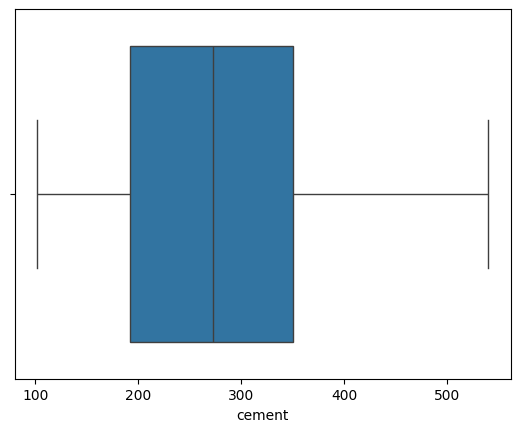

In [19]:
#Distribution of CEMENT

sns.boxplot(x='cement',data=df, orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\lucar\AppData\Local\Temp\ipykernel_1588\1070199996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cement']).set_title('cement')


<IPython.core.display.Javascript object>

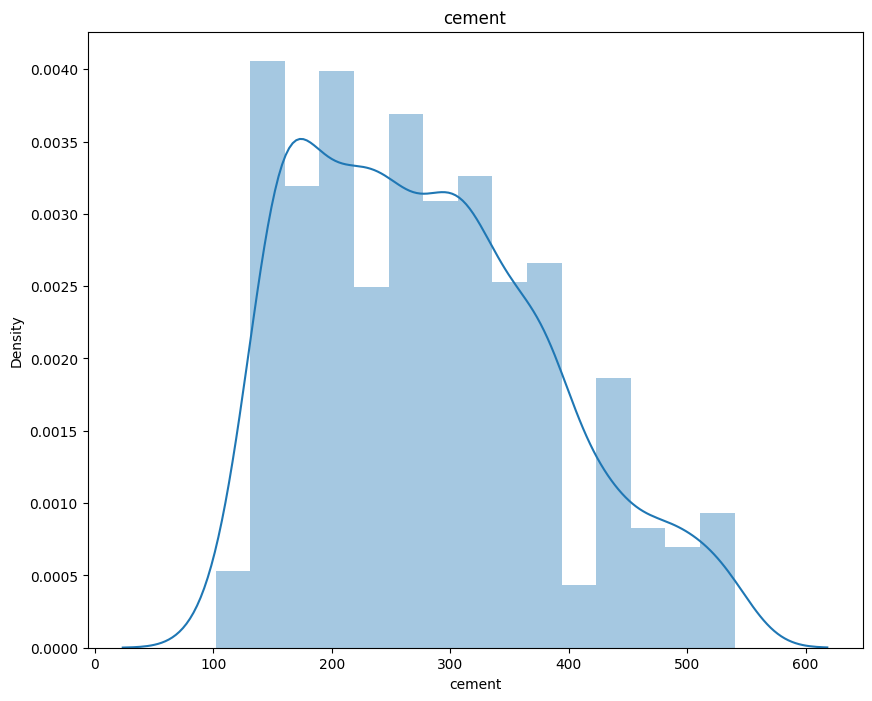

In [20]:
plt.figure(figsize=(10,8))
sns.distplot(df['cement']).set_title('cement')
plt.show()

#### Ash

In [21]:
#Quartiles
from scipy import stats

ash_Q1=df['ash'].quantile(q=0.25)
ash_Q3=df['ash'].quantile(q=0.75)

print('1st Quartile (ash_Q1) is: ',ash_Q1)
print('3rd Quartile (ash_Q3) is: ',ash_Q3)
print('Interquartile range (ash_IQR) is ', stats.iqr(df['ash']))

1st Quartile (ash_Q1) is:  0.0
3rd Quartile (ash_Q3) is:  118.3
Interquartile range (ash_IQR) is  118.3


In [22]:
#Outlier detection from Interquartile range (IQR) in original data

L_outliers=ash_Q1-1.5*(ash_Q3-ash_Q1)
U_outliers=ash_Q3+1.5*(ash_Q3-ash_Q1)
print('Lower outlier limit in ash: ',L_outliers)
print('Upper outlier limit in ash: ',U_outliers)

Lower outlier limit in ash:  -177.45
Upper outlier limit in ash:  295.75


In [23]:
print('Number of outliers in ash upper: ', df[df['ash']>295.75]['ash'].count())
print('Number of outliers in ash lower: ', df[df['ash']<-177.45]['ash'].count())

# print('% of Outlier in cement upper: ', round(df[df['ash']>586.4375]['ash'].count()*100/len(df)))
# print('% of Outlier in cement lower: ', round(df[df['ash']<-44.0625]['ash'].count()*100/len(df)))

Number of outliers in ash upper:  0
Number of outliers in ash lower:  0


<IPython.core.display.Javascript object>

<Axes: xlabel='ash'>

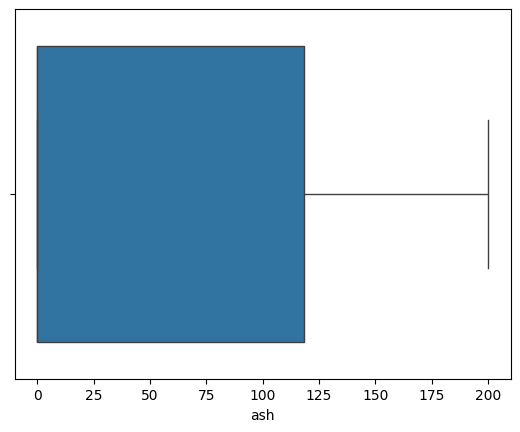

In [24]:
#Distribution of CEMENT

sns.boxplot(x='ash',data=df, orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\lucar\AppData\Local\Temp\ipykernel_1588\2741106967.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ash']).set_title('ash')


<IPython.core.display.Javascript object>

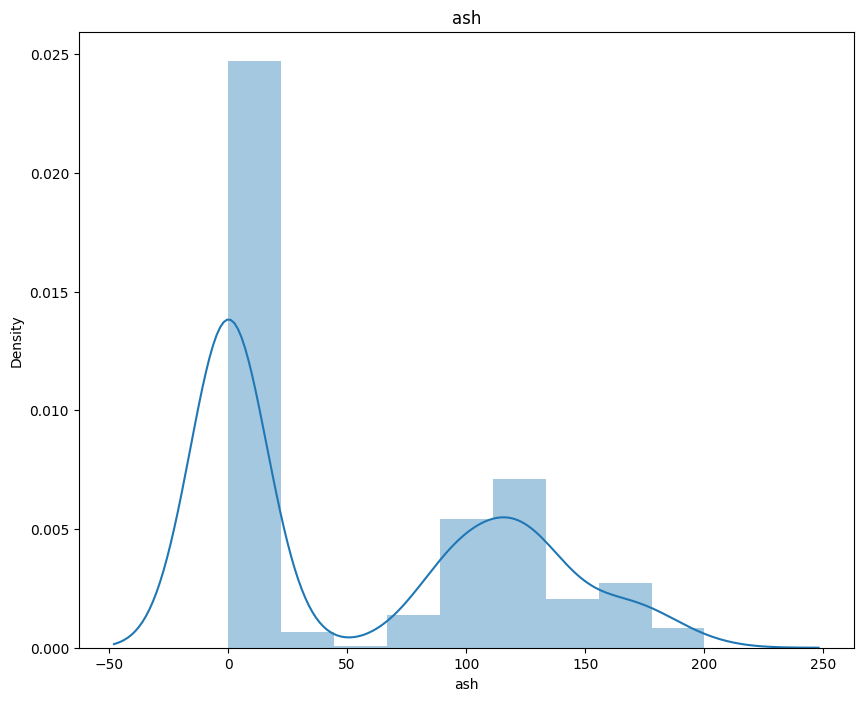

In [25]:
#displot

plt.figure(figsize=(10,8))
sns.distplot(df['ash']).set_title('ash')
plt.show()

#### Water

In [26]:
#Quartiles

water_Q1=df['water'].quantile(q=0.25)
water_Q3=df['water'].quantile(q=0.75)

print('1st Quartile (water_Q1) is: ', water_Q1)
print('3rd Quartile (water_Q3) is: ', water_Q3)
print('Interquartile range (water_IQR) is: ', stats.iqr(df['water']))

1st Quartile (water_Q1) is:  164.9
3rd Quartile (water_Q3) is:  192.0
Interquartile range (water_IQR) is:  27.099999999999994


In [27]:
#Outlier detection from Interquartile range (IQR) in original data

WL_outliers=water_Q1-1.5*(water_Q3-water_Q1)
WU_outliers=water_Q3+1.5*(water_Q3-water_Q1)

print('Lower outlier in water: ',WL_outliers)
print('Upper outlier in water: ',WU_outliers)

Lower outlier in water:  124.25000000000001
Upper outlier in water:  232.64999999999998


In [28]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in water upper: ', df[df['water']>232.64999999999998]['water'].count())
print('Number of outliers in water lower: ', df[df['water']<124.25000000000001]['water'].count())

upper_percent = df[df['water'] > 232.65]['water'].count() * 100 / len(df)
lower_percent = df[df['water'] < 124.25]['water'].count() * 100 / len(df)
print('% of Outlier in water upper: {:.2f}%'.format(upper_percent))
print('% of Outlier in water lower: {:.2f}%'.format(lower_percent))

Number of outliers in water upper:  4
Number of outliers in water lower:  5
% of Outlier in water upper: 0.39%
% of Outlier in water lower: 0.49%


<IPython.core.display.Javascript object>

<Axes: xlabel='water'>

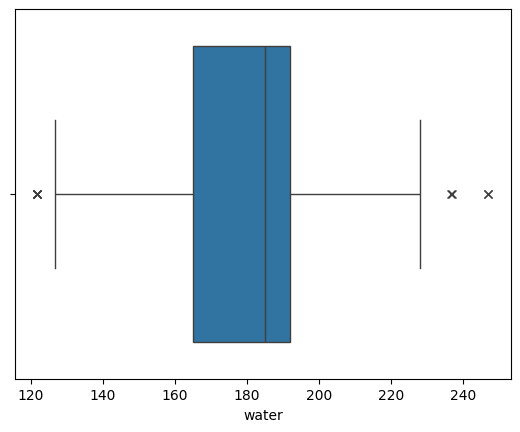

In [29]:
#Distribution of WATER

sns.boxplot(x='water', data=df, orient='h', flierprops=dict(marker='x', markerfacecolor='red', markersize=6))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\lucar\AppData\Local\Temp\ipykernel_1588\2153982199.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['water']).set_title('water')


<IPython.core.display.Javascript object>

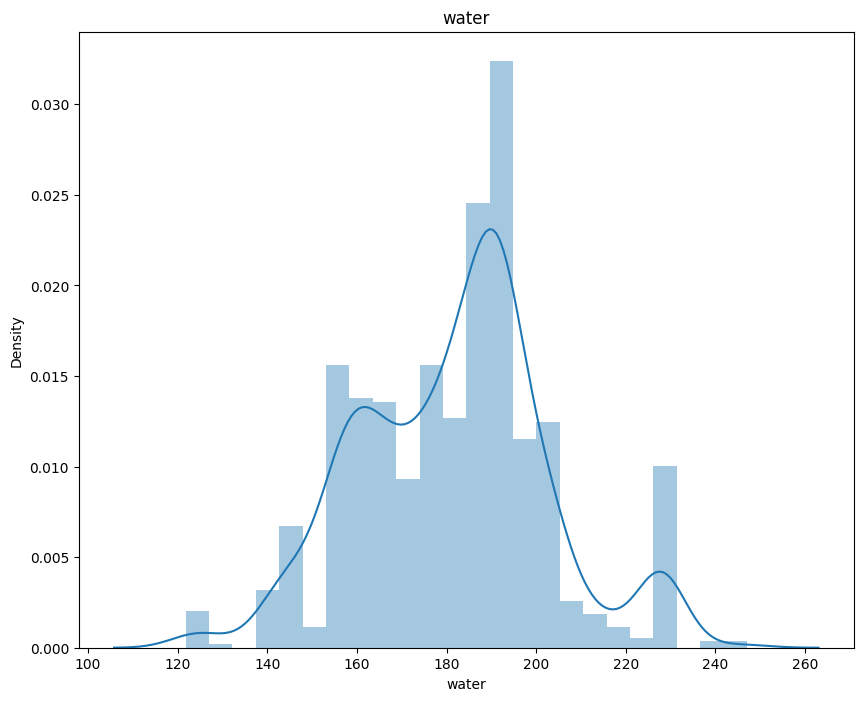

In [30]:
plt.figure(figsize=(10,8))
sns.distplot(df['water']).set_title('water')
plt.show()

#### Slag

In [31]:
#Quartiles

slag_Q1=df['slag'].quantile(q=0.25)
slag_Q3=df['slag'].quantile(q=0.75)

print('1st Quartile (slag_Q1) is: ', slag_Q1)
print('3rd Quartile (slag_Q3) is: ', slag_Q3)
print('Interquartile range (slag_IQR) is: ', stats.iqr(df['slag']))

1st Quartile (slag_Q1) is:  0.0
3rd Quartile (slag_Q3) is:  142.95
Interquartile range (slag_IQR) is:  142.95


In [32]:
#Outlier detection from Interquartile range (IQR) in original data

L_outliers=slag_Q1-1.5*(slag_Q3-slag_Q1)
U_outliers=slag_Q3+1.5*(slag_Q3-slag_Q1)

print('Lower outlier in slag: ',L_outliers)
print('Upper outlier in slag: ',U_outliers)

Lower outlier in slag:  -214.42499999999998
Upper outlier in slag:  357.375


In [33]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in slag upper: ', df[df['slag']>357.375]['slag'].count())
print('Number of outliers in slag lower: ', df[df['slag']<-214.425]['slag'].count())

upper_percent = df[df['slag'] > 232.65]['slag'].count() * 100 / len(df)
print('% of Outlier in slag upper: {:.2f}%'.format(upper_percent))

Number of outliers in slag upper:  2
Number of outliers in slag lower:  0
% of Outlier in slag upper: 5.34%


<IPython.core.display.Javascript object>

<Axes: xlabel='slag'>

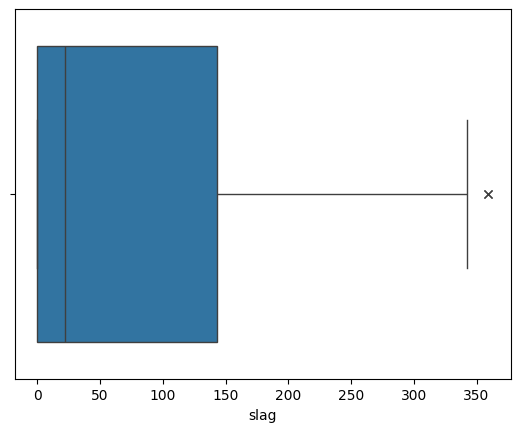

In [34]:
#Distribution of Slag

sns.boxplot(x='slag', data=df, orient='h', flierprops=dict(marker='x', markerfacecolor='red', markersize=6))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\lucar\AppData\Local\Temp\ipykernel_1588\3227964707.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['slag']).set_title('slag')


<IPython.core.display.Javascript object>

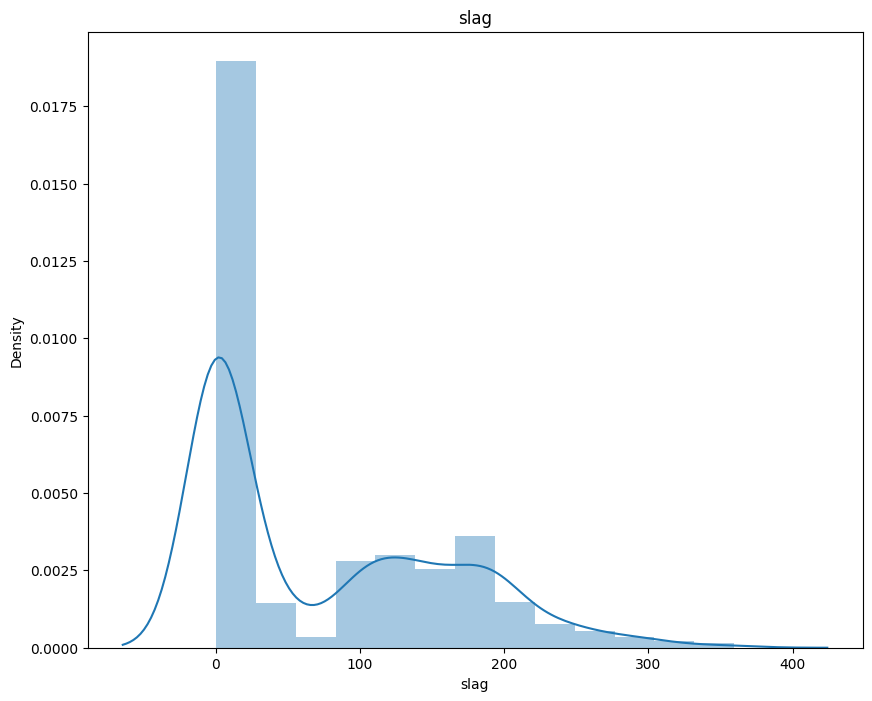

In [35]:
plt.figure(figsize=(10,8))
sns.distplot(df['slag']).set_title('slag')
plt.show()

#### Age 

In [36]:
#Quartiles

age_Q1=df['age'].quantile(q=0.25)
age_Q3=df['age'].quantile(q=0.75)

print('1st Quartile (age_Q1) is: ', age_Q1)
print('3rd Quartile (age_Q3) is: ', age_Q3)
print('Interquartile range (age_IQR) is: ', stats.iqr(df['age']))

1st Quartile (age_Q1) is:  7.0
3rd Quartile (age_Q3) is:  56.0
Interquartile range (age_IQR) is:  49.0


In [37]:
#Outlier detection from Interquartile range (IQR) in original data

L_outliers=age_Q1-1.5*(age_Q3-age_Q1)
U_outliers=age_Q3+1.5*(age_Q3-age_Q1)

print('Lower outlier in age: ',L_outliers)
print('Upper outlier in age: ',U_outliers)

Lower outlier in age:  -66.5
Upper outlier in age:  129.5


In [38]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in age upper: ', df[df['age']>129.5]['age'].count())
print('Number of outliers in age lower: ', df[df['age']<-66.5]['age'].count())

upper_percent = df[df['age'] > 232.65]['age'].count() * 100 / len(df)
print('% of Outlier in age upper: {:.2f}%'.format(upper_percent))

Number of outliers in age upper:  59
Number of outliers in age lower:  0
% of Outlier in age upper: 3.20%


<IPython.core.display.Javascript object>

<Axes: xlabel='age'>

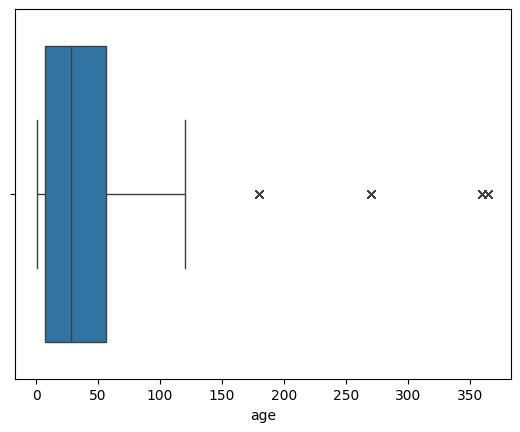

In [39]:
#Distribution of Age

sns.boxplot(x='age', data=df, orient='h', flierprops=dict(marker='x', markerfacecolor='red', markersize=6))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\lucar\AppData\Local\Temp\ipykernel_1588\738096326.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age']).set_title('age')


<IPython.core.display.Javascript object>

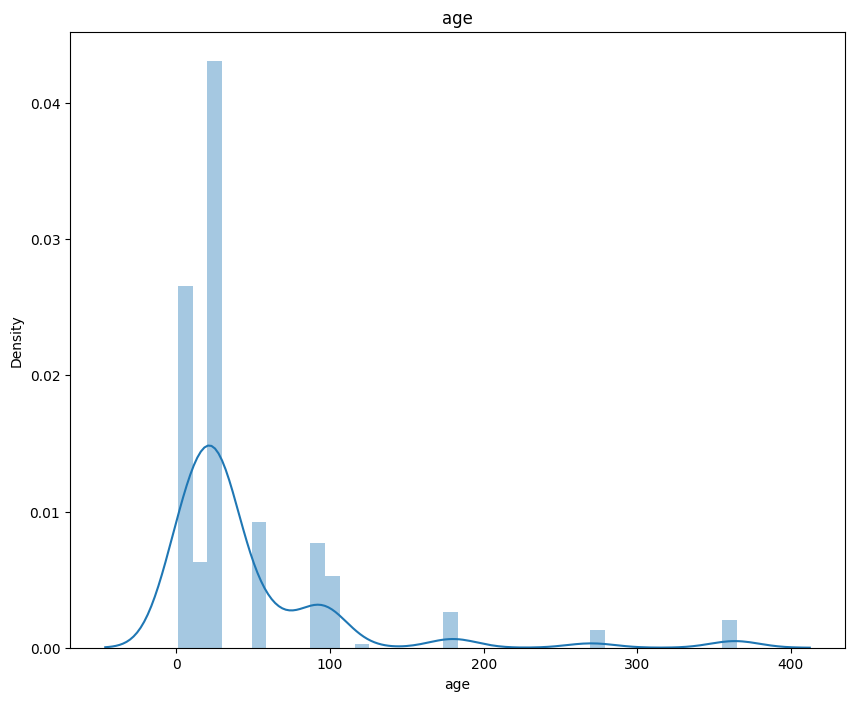

In [40]:
plt.figure(figsize=(10,8))
sns.distplot(df['age']).set_title('age')
plt.show()

#### Ash

In [41]:
#Quartiles

ash_Q1=df['ash'].quantile(q=0.25)
ash_Q3=df['ash'].quantile(q=0.75)

print('1st Quartile (ash_Q1) is: ', ash_Q1)
print('3rd Quartile (ash_Q3) is: ', ash_Q3)
print('Interquartile range (ash_IQR) is: ', stats.iqr(df['ash']))

1st Quartile (ash_Q1) is:  0.0
3rd Quartile (ash_Q3) is:  118.3
Interquartile range (ash_IQR) is:  118.3


In [42]:
#Outlier detection from Interquartile range (IQR) in original data

L_outliers=ash_Q1-1.5*(ash_Q3-ash_Q1)
U_outliers=ash_Q3+1.5*(ash_Q3-ash_Q1)

print('Lower outlier in ash: ',L_outliers)
print('Upper outlier in ash: ',U_outliers)

Lower outlier in ash:  -177.45
Upper outlier in ash:  295.75


In [43]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in ash upper: ', df[df['ash']>295.75]['ash'].count())
print('Number of outliers in ash lower: ', df[df['ash']<-177.45]['ash'].count())

Number of outliers in ash upper:  0
Number of outliers in ash lower:  0


<IPython.core.display.Javascript object>

<Axes: xlabel='ash'>

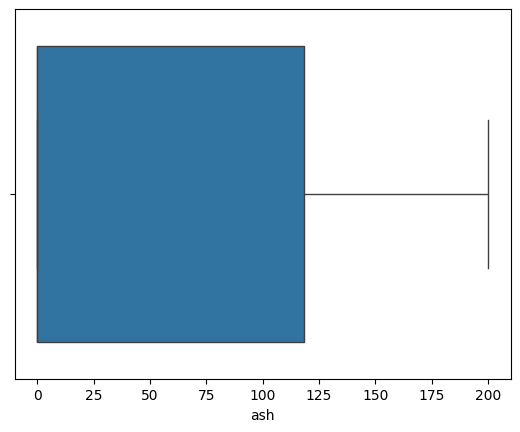

In [44]:
#Distribution of Ash

sns.boxplot(x='ash', data=df, orient='h', flierprops=dict(marker='x', markerfacecolor='red', markersize=6))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\lucar\AppData\Local\Temp\ipykernel_1588\4077625567.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age']).set_title('ash')


<IPython.core.display.Javascript object>

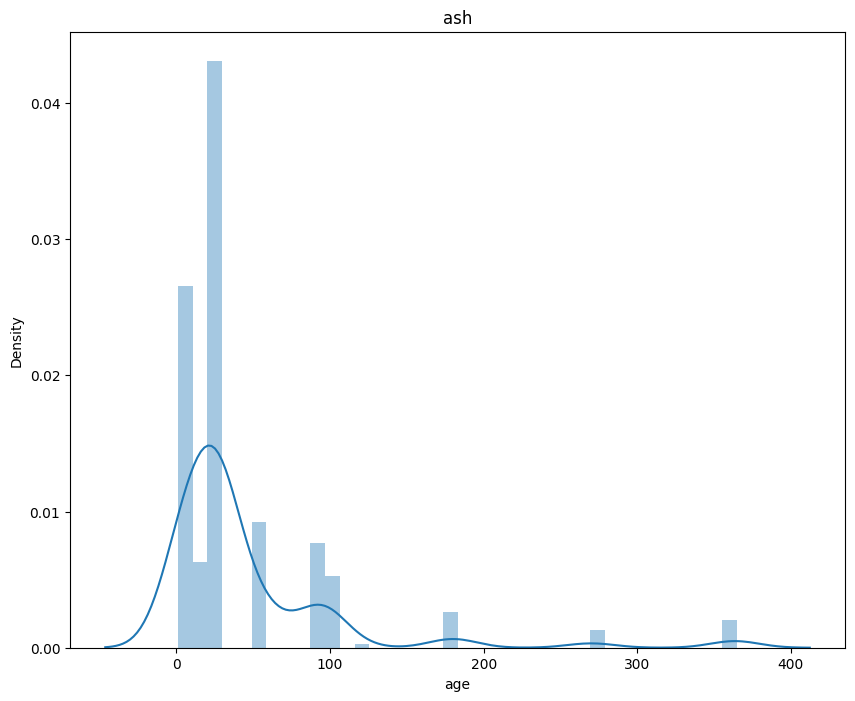

In [45]:
plt.figure(figsize=(10,8))
sns.distplot(df['age']).set_title('ash')
plt.show()

#### Superplasticizer

In [46]:
#Quartiles

superplasticizer_Q1=df['superplasticizer'].quantile(q=0.25)
superplasticizer_Q3=df['superplasticizer'].quantile(q=0.75)

print('1st Quartile (superplasticizer_Q1) is: ', superplasticizer_Q1)
print('3rd Quartile (superplasticizer_Q3) is: ', superplasticizer_Q3)
print('Interquartile range (superplasticizer_IQR) is: ', stats.iqr(df['superplasticizer']))

1st Quartile (superplasticizer_Q1) is:  0.0
3rd Quartile (superplasticizer_Q3) is:  10.2
Interquartile range (superplasticizer_IQR) is:  10.2


In [47]:
#Outlier detection from Interquartile range (IQR) in original data

L_outliers=superplasticizer_Q1-1.5*(superplasticizer_Q3-superplasticizer_Q1)
U_outliers=superplasticizer_Q3+1.5*(superplasticizer_Q3-superplasticizer_Q1)

print('Lower outlier in superplasticizer: ',L_outliers)
print('Upper outlier in superplasticizer: ',U_outliers)

Lower outlier in superplasticizer:  -15.299999999999999
Upper outlier in superplasticizer:  25.5


In [48]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in superplasticizer upper: ', df[df['superplasticizer']>25.5]['superplasticizer'].count())
print('Number of outliers in superplasticizer lower: ', df[df['superplasticizer']<-15.299999999999999]['superplasticizer'].count())

upper_percent = df[df['superplasticizer'] > 232.65]['water'].count() * 100 / len(df)
print('% of Outlier in superplasticizer upper: {:.2f}%'.format(upper_percent))

Number of outliers in superplasticizer upper:  10
Number of outliers in superplasticizer lower:  0
% of Outlier in superplasticizer upper: 0.00%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\lucar\AppData\Local\Temp\ipykernel_1588\2367884638.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['superplasticizer']).set_title('superplasticizer')


<IPython.core.display.Javascript object>

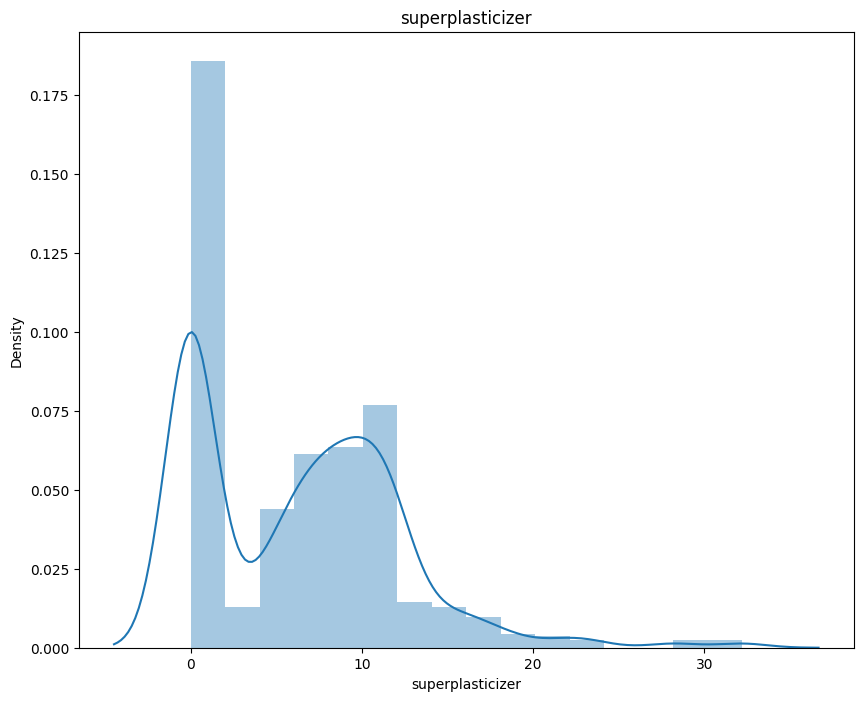

In [49]:
plt.figure(figsize=(10,8))
sns.distplot(df['superplasticizer']).set_title('superplasticizer')
plt.show()

#### coarseagg

In [50]:
#Quartiles

coarseagg_Q1=df['coarseagg'].quantile(q=0.25)
coarseagg_Q3=df['coarseagg'].quantile(q=0.75)

print('1st Quartile (coarseagg_Q1) is: ', coarseagg_Q1)
print('3rd Quartile (coarseagg_Q3) is: ', coarseagg_Q3)
print('Interquartile range (coarseagg_IQR) is: ', stats.iqr(df['coarseagg']))

1st Quartile (coarseagg_Q1) is:  932.0
3rd Quartile (coarseagg_Q3) is:  1029.4
Interquartile range (coarseagg_IQR) is:  97.40000000000009


In [51]:
# Calculate proper bounds

L_outliers=coarseagg_Q1-1.5*(coarseagg_Q3-coarseagg_Q1)
U_outliers=coarseagg_Q3+1.5*(coarseagg_Q3-coarseagg_Q1)

print('Lower outlier in coarseagg: ',L_outliers)
print('Upper outlier in coarseagg: ',U_outliers)

Lower outlier in coarseagg:  785.8999999999999
Upper outlier in coarseagg:  1175.5000000000002


In [52]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in coarseagg upper: ', df[df['coarseagg']>1175.5000000000002]['coarseagg'].count())
print('Number of outliers in coarseagg lower: ', df[df['coarseagg']<785.8999999999999]['coarseagg'].count())

Number of outliers in coarseagg upper:  0
Number of outliers in coarseagg lower:  0


<IPython.core.display.Javascript object>

<Axes: xlabel='coarseagg'>

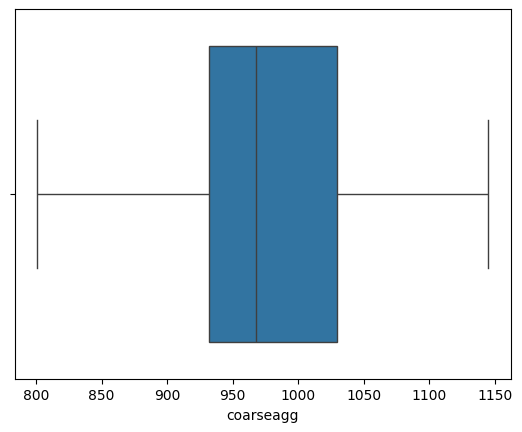

In [53]:
#Distribution of Ash

sns.boxplot(x='coarseagg', data=df, orient='h', flierprops=dict(marker='x', markerfacecolor='red', markersize=6))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\lucar\AppData\Local\Temp\ipykernel_1588\2997730633.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['coarseagg']).set_title('coarseagg')


<IPython.core.display.Javascript object>

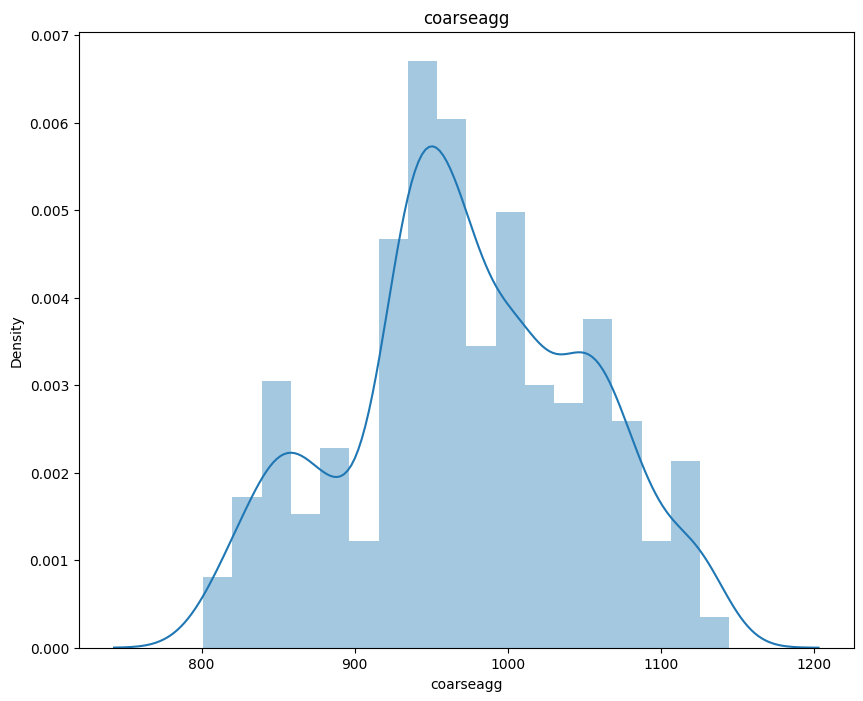

In [54]:
plt.figure(figsize=(10,8))
sns.distplot(df['coarseagg']).set_title('coarseagg')
plt.show()

#### fineagg

In [55]:
#Quartiles

fineagg_Q1=df['fineagg'].quantile(q=0.25)
fineagg_Q3=df['fineagg'].quantile(q=0.75)

print('1st Quartile (fineagg_Q1) is: ', fineagg_Q1)
print('3rd Quartile (fineagg_Q3) is: ', fineagg_Q3)
print('Interquartile range (fineagg_IQR) is: ', stats.iqr(df['fineagg']))

1st Quartile (fineagg_Q1) is:  730.95
3rd Quartile (fineagg_Q3) is:  824.0
Interquartile range (fineagg_IQR) is:  93.04999999999995


In [56]:
# Calculate proper bounds

L_outliers=fineagg_Q1-1.5*(fineagg_Q3-fineagg_Q1)
U_outliers=fineagg_Q3+1.5*(fineagg_Q3-fineagg_Q1)

print('Lower outlier in fineagg: ',L_outliers)
print('Upper outlier in fineagg: ',U_outliers)

Lower outlier in fineagg:  591.3750000000001
Upper outlier in fineagg:  963.5749999999999


In [57]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in fineagg upper: ', df[df['fineagg']>963.5749999999999]['fineagg'].count())
print('Number of outliers in fineagg lower: ', df[df['fineagg']<591.3750000000001]['fineagg'].count())

Number of outliers in fineagg upper:  5
Number of outliers in fineagg lower:  0


<IPython.core.display.Javascript object>

<Axes: xlabel='fineagg'>

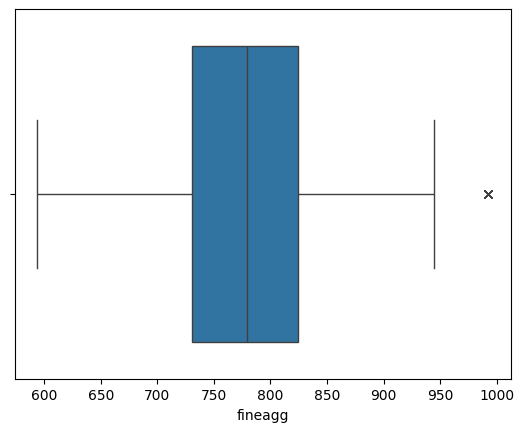

In [58]:
#Distribution of Ash

sns.boxplot(x='fineagg', data=df, orient='h', flierprops=dict(marker='x', markerfacecolor='red', markersize=6))

#Multi variate analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\lucar\AppData\Local\Temp\ipykernel_1588\2697280910.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cement'], ax=ax2[0][0], kde=True)


<IPython.core.display.Javascript object>

C:\Users\lucar\AppData\Local\Temp\ipykernel_1588\2697280910.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['slag'],ax=ax2[0][1])


<IPython.core.display.Javascript object>

C:\Users\lucar\AppData\Local\Temp\ipykernel_1588\2697280910.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ash'],ax=ax2[0][2])


<IPython.core.display.Javascript object>

C:\Users\lucar\AppData\Local\Temp\ipykernel_1588\2697280910.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['water'],ax=ax2[1][0])


<IPython.core.display.Javascript object>

C:\Users\lucar\AppData\Local\Temp\ipykernel_1588\2697280910.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['superplasticizer'],ax=ax2[1][1])


<IPython.core.display.Javascript object>

C:\Users\lucar\AppData\Local\Temp\ipykernel_1588\2697280910.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['coarseagg'],ax=ax2[1][2])


<IPython.core.display.Javascript object>

C:\Users\lucar\AppData\Local\Temp\ipykernel_1588\2697280910.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fineagg'],ax=ax2[2][0])


<IPython.core.display.Javascript object>

C:\Users\lucar\AppData\Local\Temp\ipykernel_1588\2697280910.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],ax=ax2[2][1])


<IPython.core.display.Javascript object>

C:\Users\lucar\AppData\Local\Temp\ipykernel_1588\2697280910.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['strength'],ax=ax2[2][2])


<Axes: xlabel='strength', ylabel='Density'>

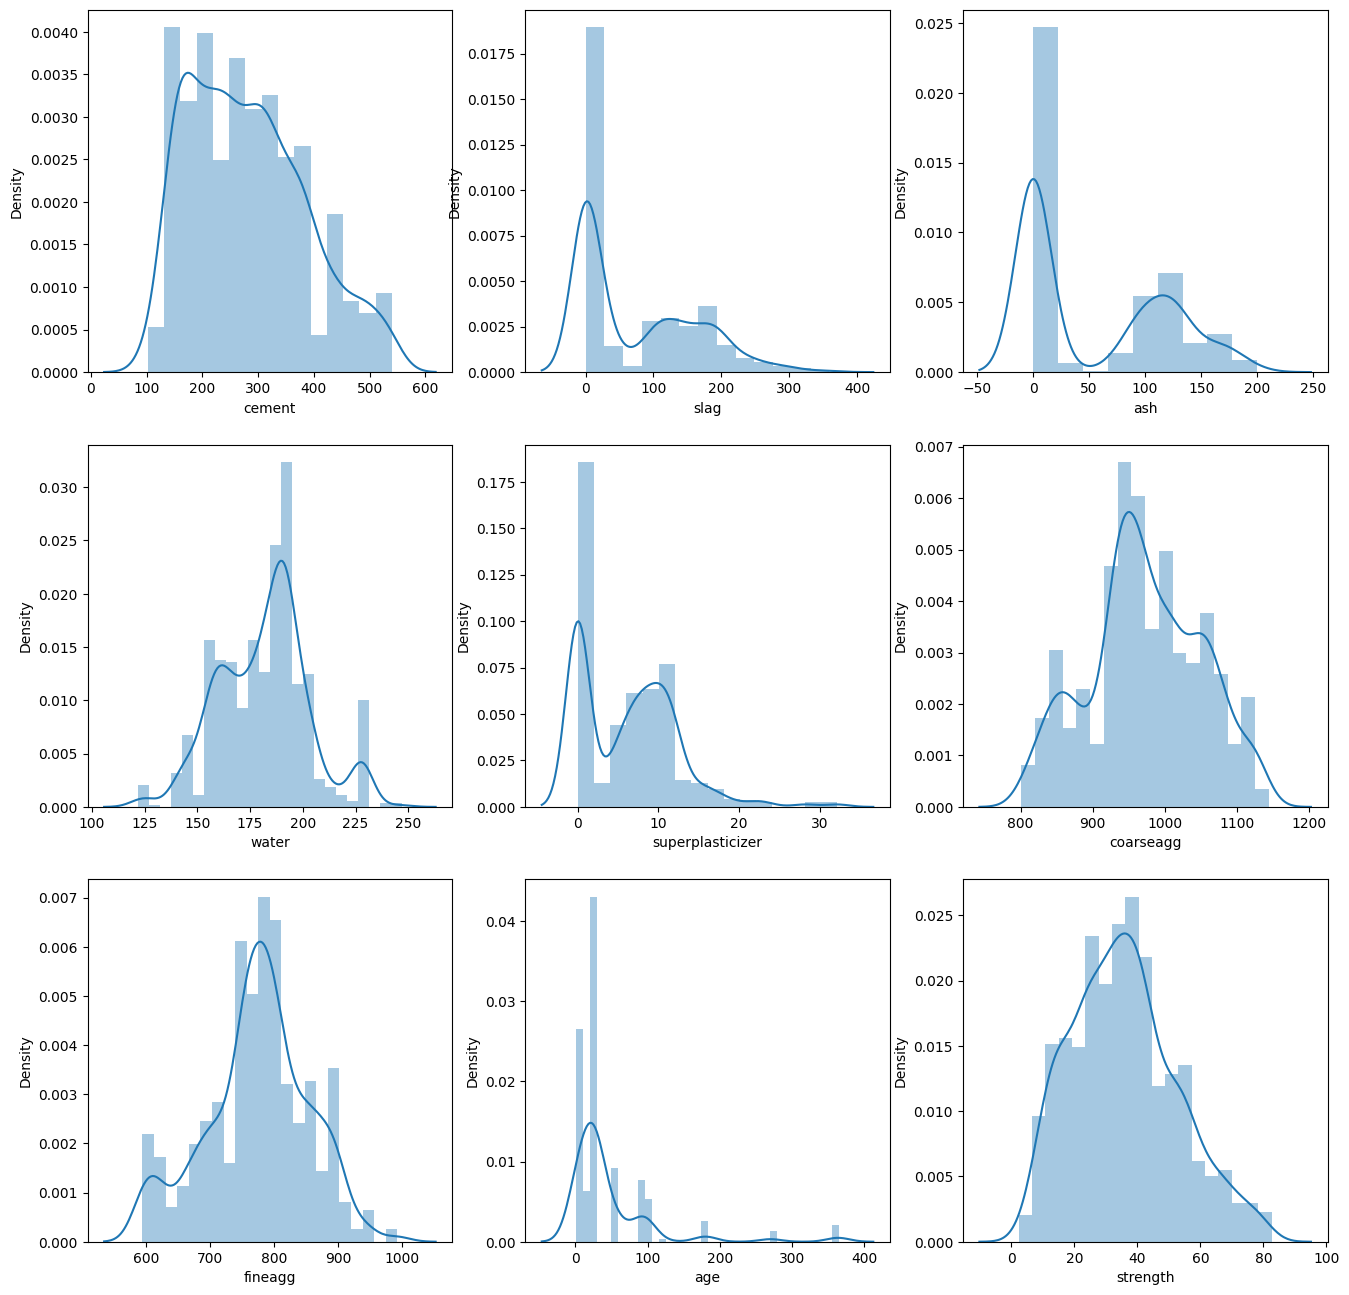

In [59]:
#Displot

fig,ax2 = plt.subplots(3,3,figsize=(16,16))
sns.distplot(df['cement'], ax=ax2[0][0], kde=True)
sns.distplot(df['slag'],ax=ax2[0][1])
sns.distplot(df['ash'],ax=ax2[0][2])
sns.distplot(df['water'],ax=ax2[1][0])
sns.distplot(df['superplasticizer'],ax=ax2[1][1])
sns.distplot(df['coarseagg'],ax=ax2[1][2])
sns.distplot(df['fineagg'],ax=ax2[2][0])
sns.distplot(df['age'],ax=ax2[2][1])
sns.distplot(df['strength'],ax=ax2[2][2])

#Pair plot

<IPython.core.display.Javascript object>

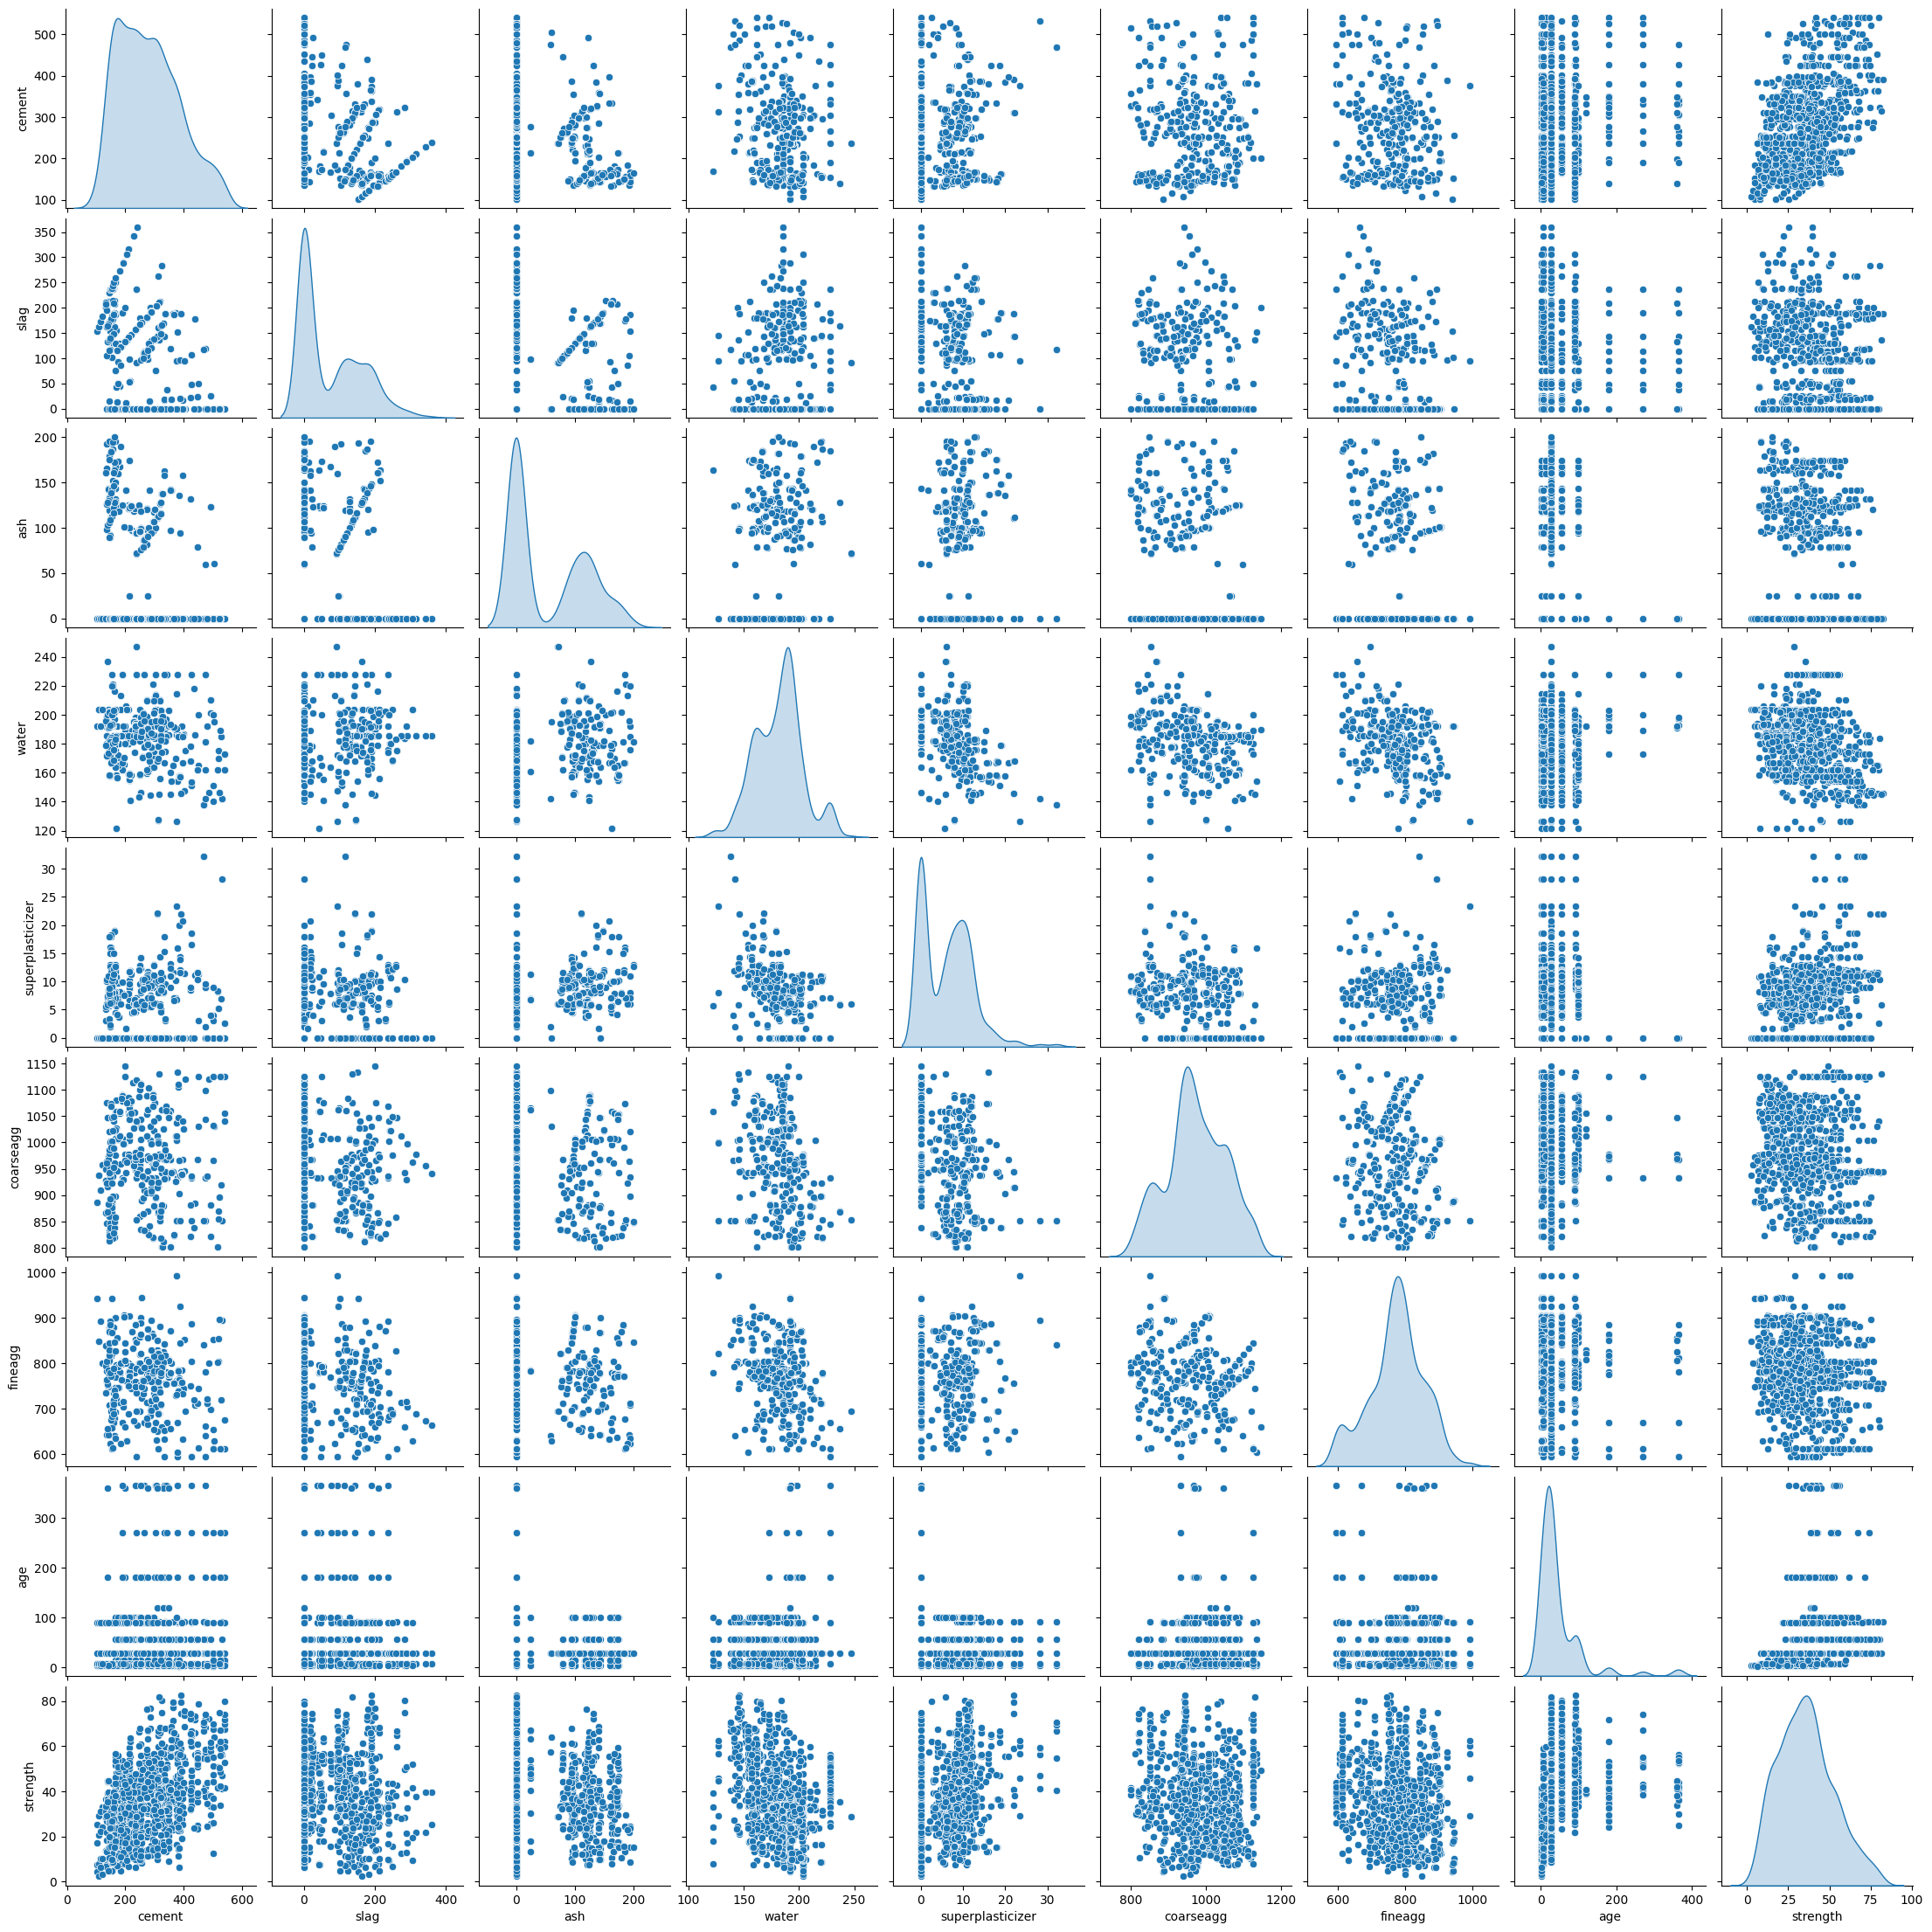

In [60]:
# pairplot.
#plot density curve instead of histogram in the diagonals

sns.pairplot(df, diag_kind='kde')

#Pearson correlation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

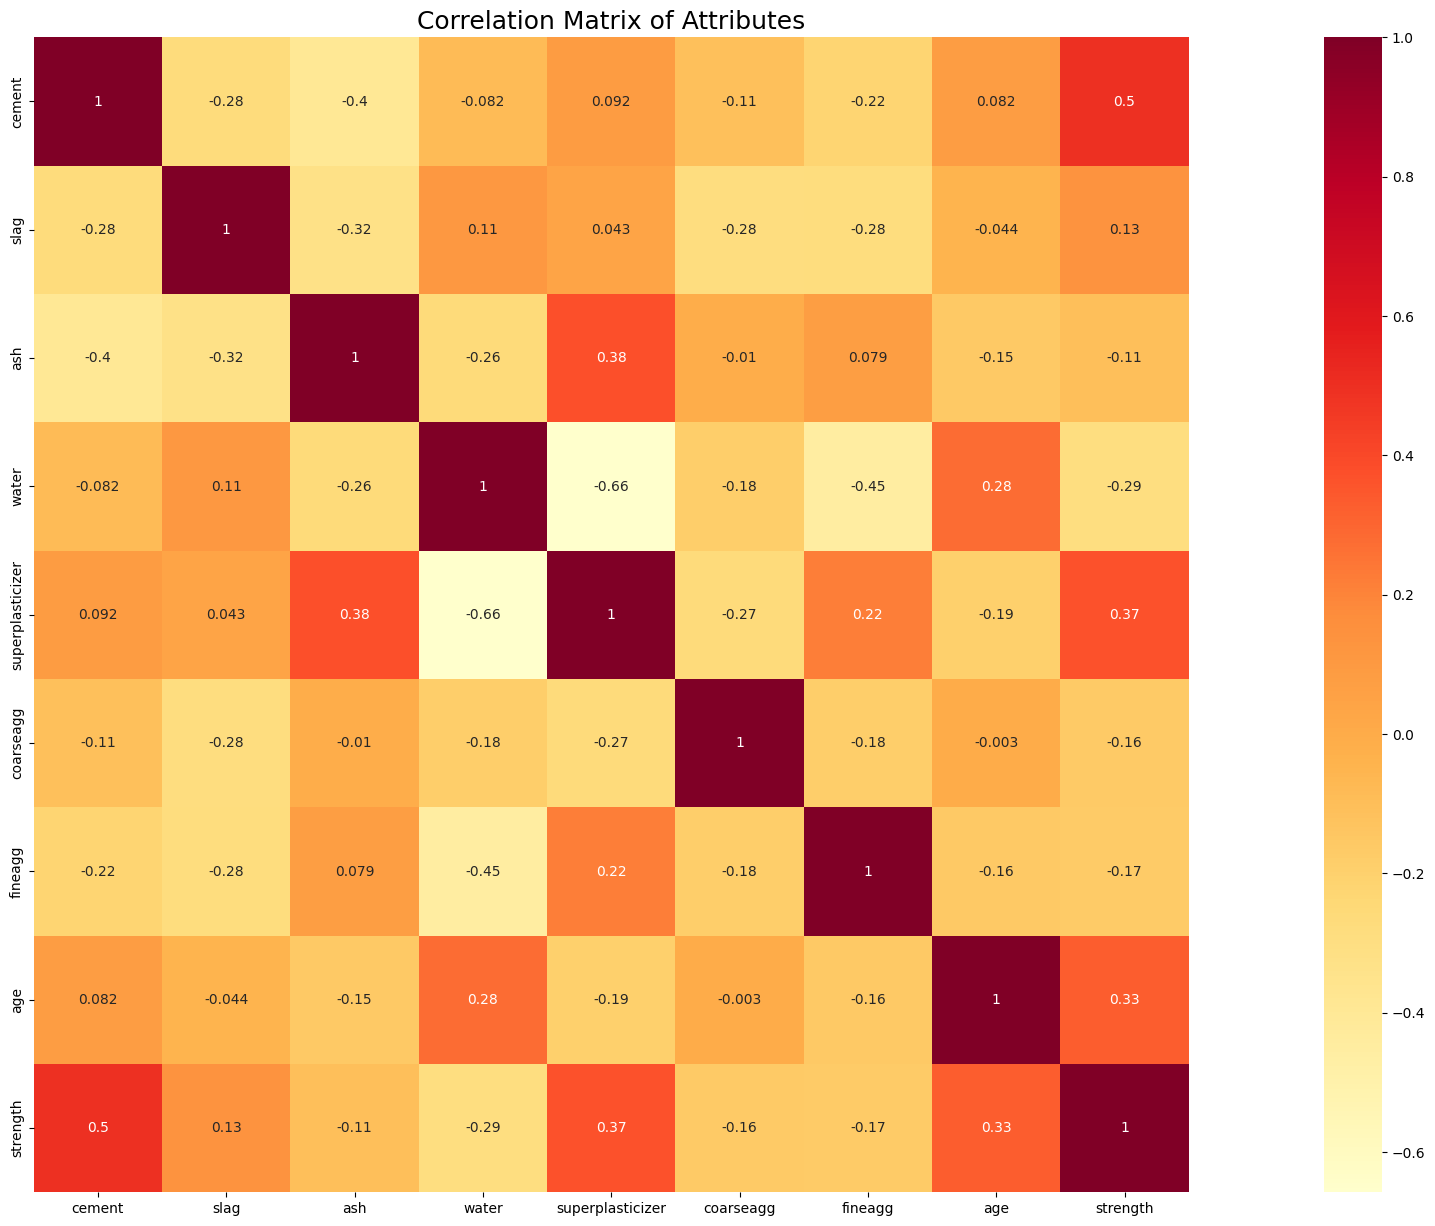

In [61]:
plt.figure(figsize=(35,15))

sns.heatmap(df.corr(),vmax=1, square=True, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix of Attributes', fontsize=18)
plt.show()

#Feature pre preprocessing for all models

In [62]:
#New Ratios between features
df_engineered = df.copy()

df_engineered['water_cement_ratio'] = df['water'] / df['cement']
df_engineered['slag_cement_ratio'] = df['slag'] / df['cement']
df_engineered['ash_cement_ratio'] = df['ash'] / df['cement']
df_engineered['aggregate_cement_ratio'] = (df['coarseagg'] + df['fineagg']) / df['cement']
df_engineered['superplasticizer_cement_ratio'] = df['superplasticizer'] / df['cement']
df_engineered['coarse_fine_agg_ratio'] = df['coarseagg'] / (df['fineagg'] + 1e-10)
#Binder Ratio (Ash / Total Binder)
#Total Binder = Cement + Slag + Ash
df_engineered['binder_total'] = df['cement'] + df['slag'] + df['ash']
df_engineered['ash_binder_ratio'] = df['ash'] / (df_engineered['binder_total'] + 1e-10)
df_engineered['coarse_fine_agg_ratio'] = df['coarseagg'] / (df['fineagg'] + 1e-10)

#Age binning
bins = [0, 1, 3, 7, 14, 28, 56, 90, 180, 365]
labels = ['very_early', 'very_early2', 'early', 'early2', 'week1', 
          'week2', 'month3', 'month6', 'year1']
df_engineered['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
df_engineered['age_bin'] = pd.cut(df['age'], bins=bins, include_lowest=True).cat.codes
#Age indicators
df_engineered['is_very_early'] = (df['age'] <= 3).astype(int)
df_engineered['is_early_cure'] = ((df['age'] > 3) & (df['age'] <= 7)).astype(int)
df_engineered['is_7day'] = (df['age'] == 7).astype(int)
df_engineered['is_28day'] = (df['age'] == 28).astype(int)
df_engineered['is_mature'] = (df['age'] >= 28).astype(int)
df_engineered['is_very_mature'] = (df['age'] >= 90).astype(int)

#Binary Indicators for zero-inflated features
df_engineered['has_slag'] = (df['slag'] > 0).astype(int)
df_engineered['has_ash'] = (df['ash'] > 0).astype(int)
df_engineered['has_superplasticizer'] = (df['superplasticizer'] > 0).astype(int)

#Checking the new features
print(df_engineered.head())
print(df_engineered.columns)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   cement   slag  ash  water  superplasticizer  coarseagg  fineagg  age  \
0   540.0    0.0  0.0  162.0               2.5     1040.0    676.0   28   
1   540.0    0.0  0.0  162.0               2.5     1055.0    676.0   28   
2   332.5  142.5  0.0  228.0               0.0      932.0    594.0  270   
3   332.5  142.5  0.0  228.0               0.0      932.0    594.0  365   
4   198.6  132.4  0.0  192.0               0.0      978.4    825.5  360   

   strength  water_cement_ratio  ...  age_bin  is_very_early  is_early_cure  \
0     79.99            0.300000  ...        4              0              0   
1     61.89            0.300000  ...        4              0              0   
2     40.27            0.685714  ...        8              0              0   
3     41.05            0.685714  ...        8              0              0   
4     44.30            0.966767  ...        8              0              0   

   is_7day  is_28day  is_mature  is_very_mature has_slag  has_ash  \
0    

#New pearson correalation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

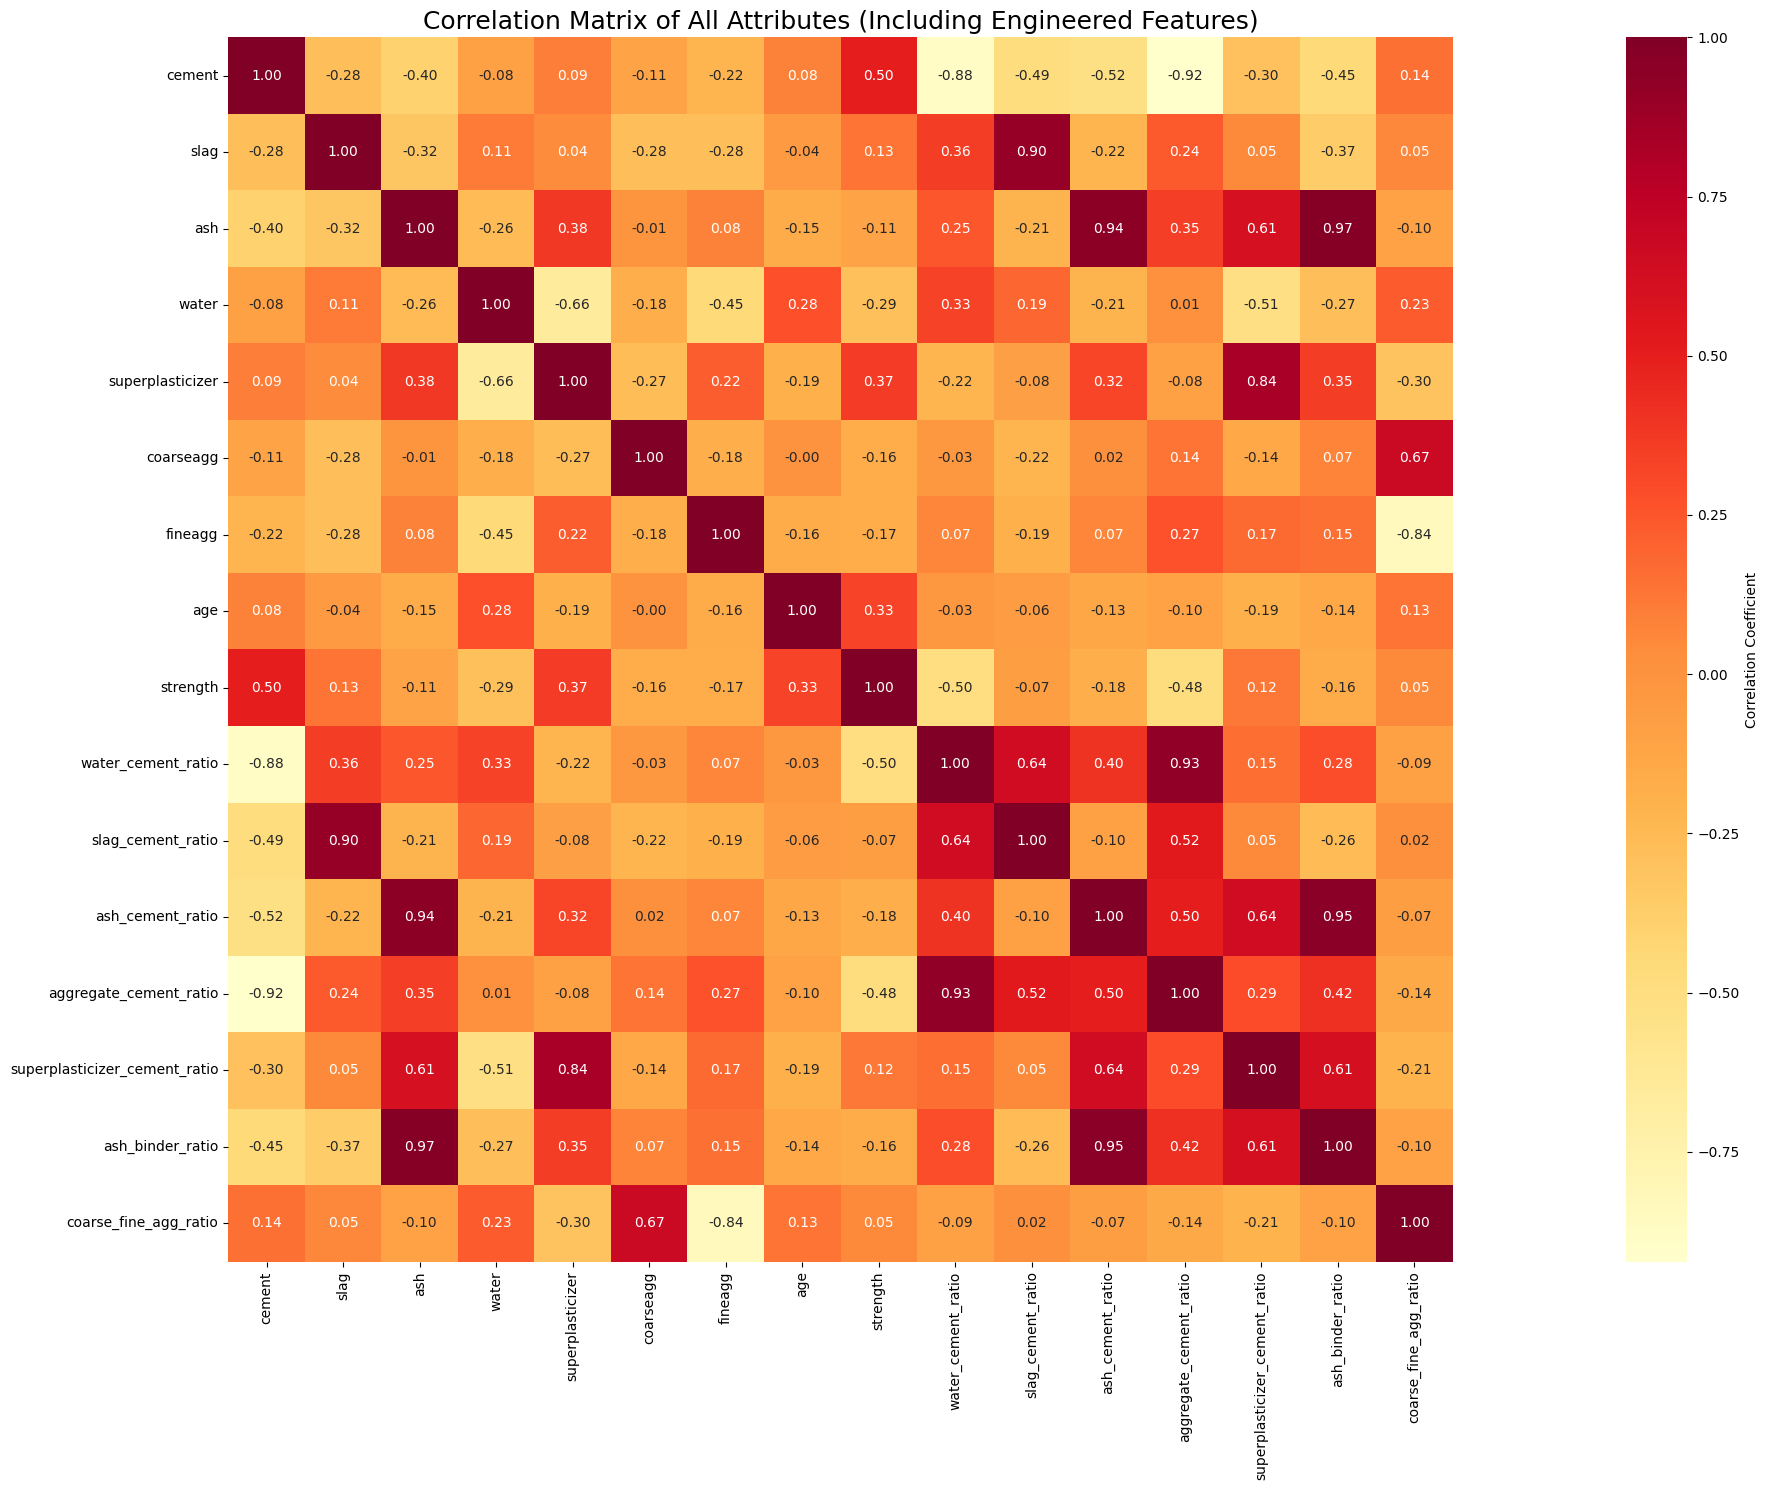

In [63]:
features_to_include = ['cement', 'slag', 'ash', 'water', 'superplasticizer', 
                       'coarseagg', 'fineagg', 'age', 'strength',
                       'water_cement_ratio', 'slag_cement_ratio', 'ash_cement_ratio', 
                       'aggregate_cement_ratio', 'superplasticizer_cement_ratio', 
                       'ash_binder_ratio', 'coarse_fine_agg_ratio']
plt.figure(figsize=(35, 15))
sns.heatmap(df_engineered[features_to_include].corr(), vmax=1, square=True, annot=True, cmap='YlOrRd', 
            fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of All Attributes (Including Engineered Features)', fontsize=18)
plt.tight_layout()
plt.show()

#Checking for outliers

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

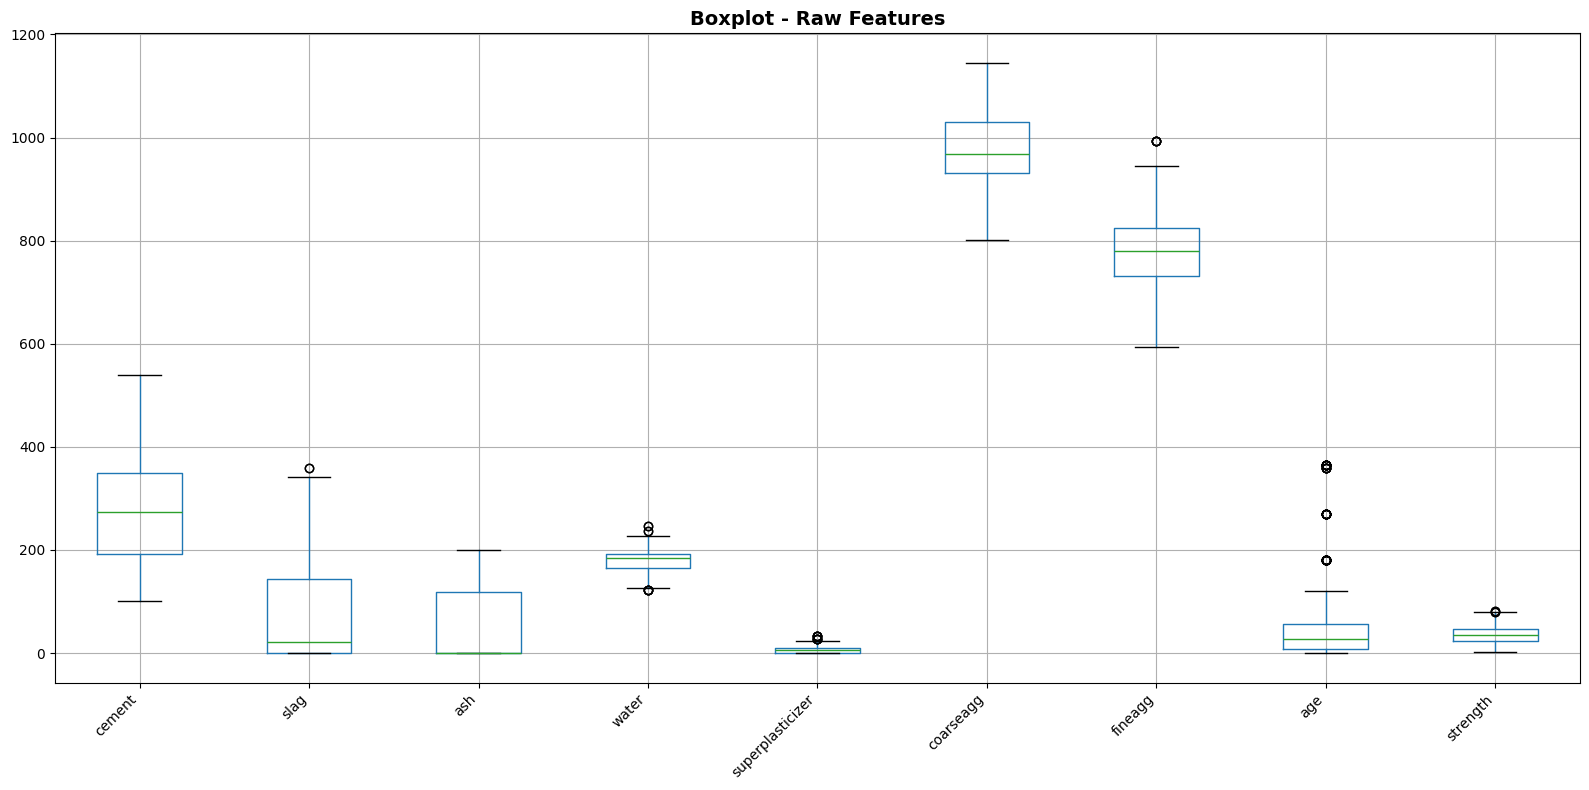

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

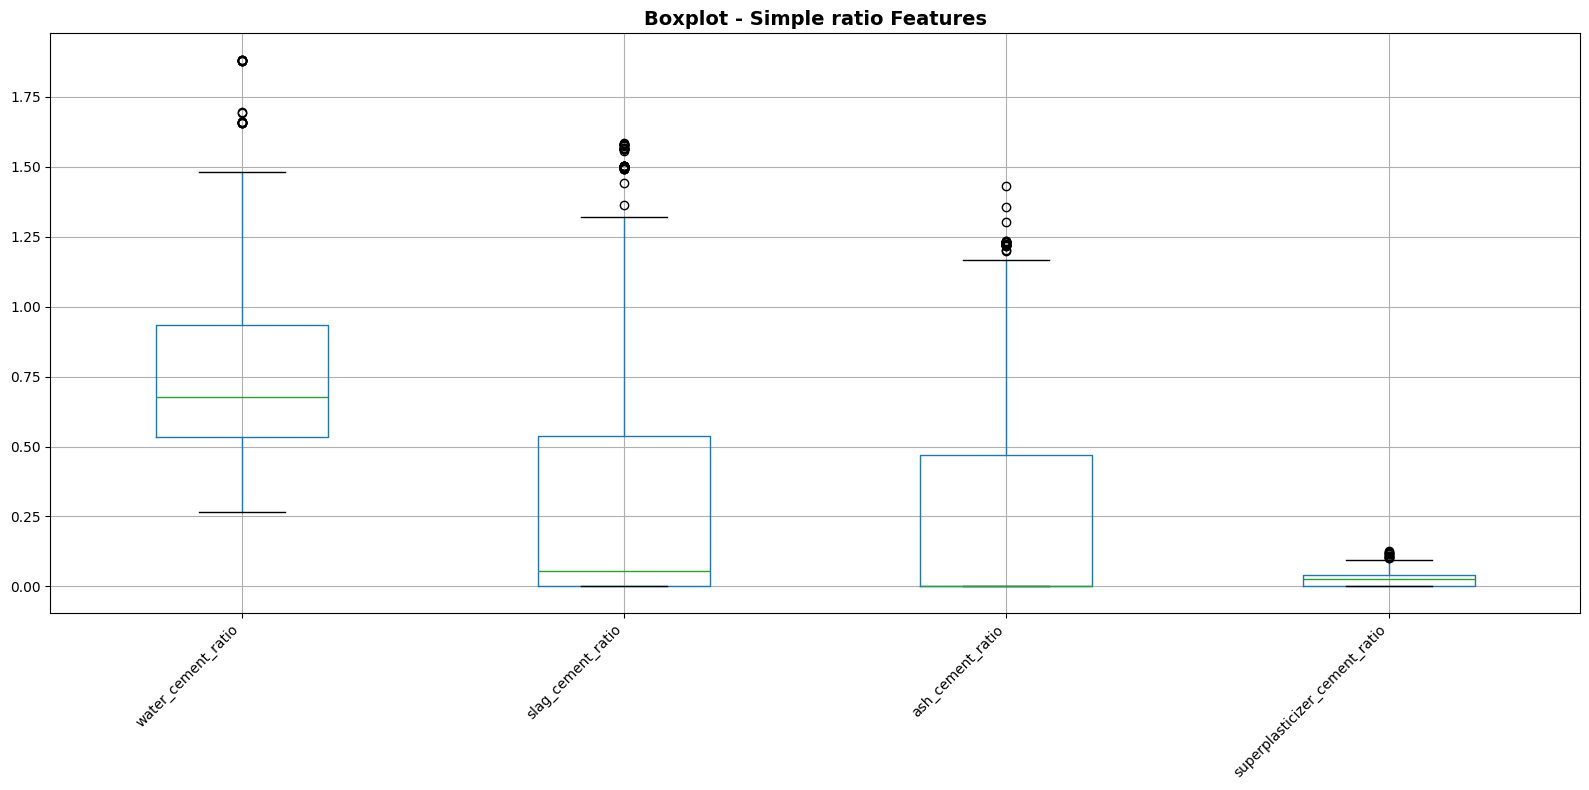

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

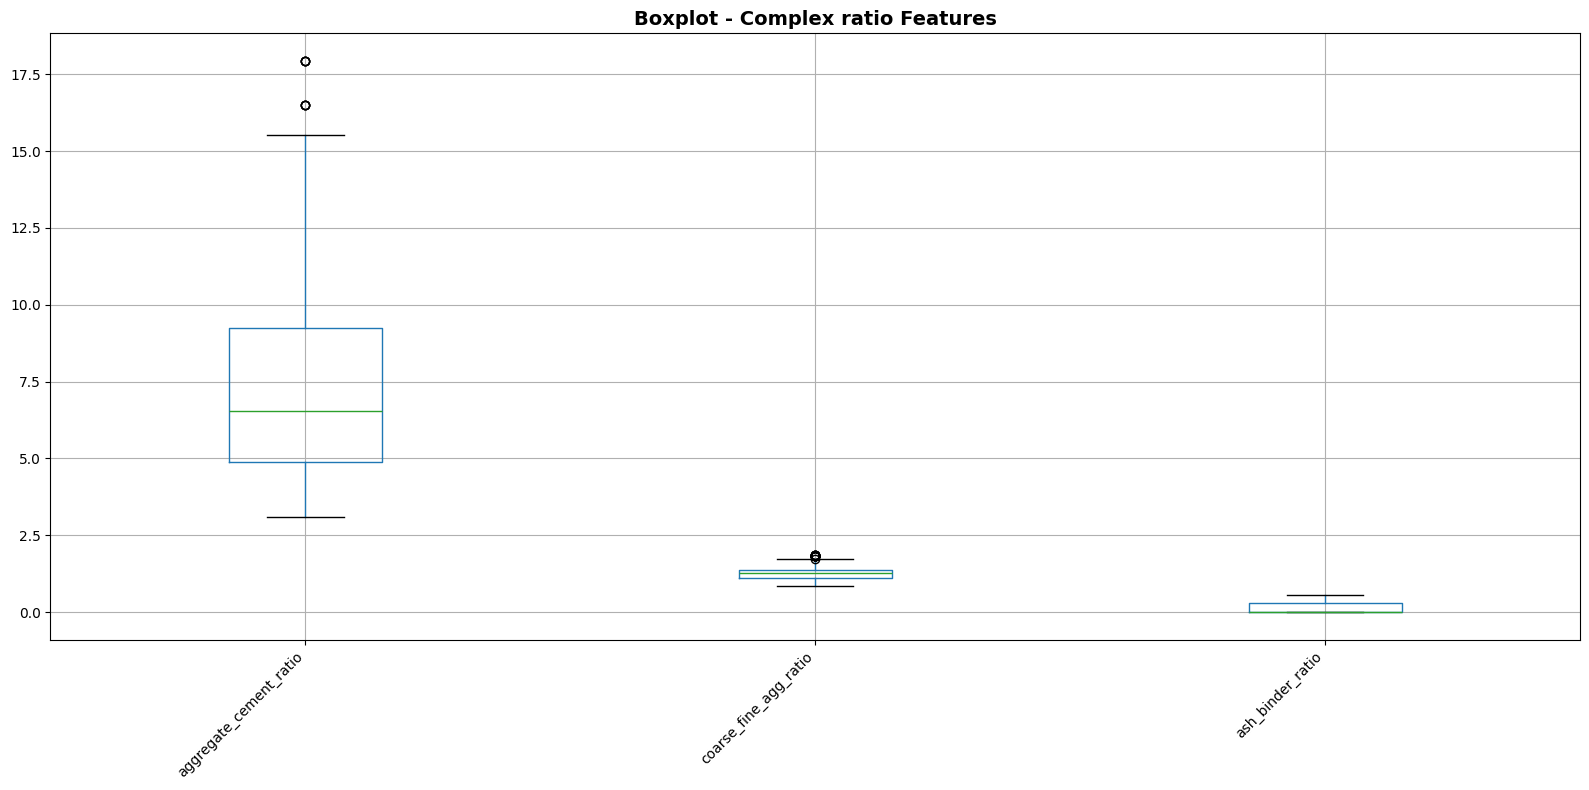

In [64]:
#Create filtered boxplots
raw_features = ['cement', 'slag', 'ash', 'water', 'superplasticizer', 
                'coarseagg', 'fineagg', 'age', 'strength']

simple_ratios = ['water_cement_ratio', 'slag_cement_ratio', 'ash_cement_ratio',
                 'superplasticizer_cement_ratio']

complex_ratios = ['aggregate_cement_ratio', 'coarse_fine_agg_ratio', 'ash_binder_ratio']

#FIGURE 1: Raw features only
fig1, ax1 = plt.subplots(figsize=(16, 8))
df_engineered[raw_features].boxplot(ax=ax1)
ax1.set_title('Boxplot - Raw Features', fontsize=14, fontweight='bold')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

#FIGURE 2: Simple ratio features only
fig2, ax2 = plt.subplots(figsize=(16, 8))
df_engineered[simple_ratios].boxplot(ax=ax2)
ax2.set_title('Boxplot - Simple ratio Features', fontsize=14, fontweight='bold')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

#FIGURE 3: Complex ratio features only
fig2, ax2 = plt.subplots(figsize=(16, 8))
df_engineered[complex_ratios].boxplot(ax=ax2)
ax2.set_title('Boxplot - Complex ratio Features', fontsize=14, fontweight='bold')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()


Outlier detection (3 sigma rule)

In [65]:
#Raw features
print('\nRaw Features')
print('Outliers in cement: ', df_engineered[((df_engineered.cement - df_engineered.cement.mean())/df_engineered.cement.std()).abs()>3]['cement'].count())
print('Outliers in slag: ', df_engineered[((df_engineered.slag - df_engineered.slag.mean())/df_engineered.slag.std()).abs()>3]['slag'].count())
print('Outliers in ash: ', df_engineered[((df_engineered.ash - df_engineered.ash.mean())/df_engineered.ash.std()).abs()>3]['ash'].count())
print('Outliers in water: ', df_engineered[((df_engineered.water - df_engineered.water.mean())/df_engineered.water.std()).abs()>3]['water'].count())
print('Outliers in superplasticizer: ', df_engineered[((df_engineered.superplasticizer - df_engineered.superplasticizer.mean())/df_engineered.superplasticizer.std()).abs()>3]['superplasticizer'].count())
print('Outliers in coarseagg: ', df_engineered[((df_engineered.coarseagg - df_engineered.coarseagg.mean())/df_engineered.coarseagg.std()).abs()>3]['coarseagg'].count())
print('Outliers in fineagg: ', df_engineered[((df_engineered.fineagg - df_engineered.fineagg.mean())/df_engineered.fineagg.std()).abs()>3]['fineagg'].count())
print('Outliers in age: ', df_engineered[((df_engineered.age - df_engineered.age.mean())/df_engineered.age.std()).abs()>3]['age'].count())

#Engineered features
print('\nEngineered Ratio Features')
print('Outliers in water_cement_ratio: ', df_engineered[((df_engineered.water_cement_ratio - df_engineered.water_cement_ratio.mean())/df_engineered.water_cement_ratio.std()).abs()>3]['water_cement_ratio'].count())
print('Outliers in slag_cement_ratio: ', df_engineered[((df_engineered.slag_cement_ratio - df_engineered.slag_cement_ratio.mean())/df_engineered.slag_cement_ratio.std()).abs()>3]['slag_cement_ratio'].count())
print('Outliers in ash_cement_ratio: ', df_engineered[((df_engineered.ash_cement_ratio - df_engineered.ash_cement_ratio.mean())/df_engineered.ash_cement_ratio.std()).abs()>3]['ash_cement_ratio'].count())
print('Outliers in aggregate_cement_ratio: ', df_engineered[((df_engineered.aggregate_cement_ratio - df_engineered.aggregate_cement_ratio.mean())/df_engineered.aggregate_cement_ratio.std()).abs()>3]['aggregate_cement_ratio'].count())
print('Outliers in superplasticizer_cement_ratio: ', df_engineered[((df_engineered.superplasticizer_cement_ratio - df_engineered.superplasticizer_cement_ratio.mean())/df_engineered.superplasticizer_cement_ratio.std()).abs()>3]['superplasticizer_cement_ratio'].count())
print('Outliers in coarse_fine_agg_ratio: ', df_engineered[((df_engineered.coarse_fine_agg_ratio - df_engineered.coarse_fine_agg_ratio.mean())/df_engineered.coarse_fine_agg_ratio.std()).abs()>3]['coarse_fine_agg_ratio'].count())
print('Outliers in ash_binder_ratio: ', df_engineered[((df_engineered.ash_binder_ratio - df_engineered.ash_binder_ratio.mean())/df_engineered.ash_binder_ratio.std()).abs()>3]['ash_binder_ratio'].count())



Raw Features
Outliers in cement:  0
Outliers in slag:  4
Outliers in ash:  0
Outliers in water:  2
Outliers in superplasticizer:  10
Outliers in coarseagg:  0
Outliers in fineagg:  0
Outliers in age:  33

Engineered Ratio Features
Outliers in water_cement_ratio:  10
Outliers in slag_cement_ratio:  0
Outliers in ash_cement_ratio:  3
Outliers in aggregate_cement_ratio:  8
Outliers in superplasticizer_cement_ratio:  12
Outliers in coarse_fine_agg_ratio:  29
Outliers in ash_binder_ratio:  0


#Prepare data for modelling

In [66]:
X = df_engineered.drop(columns=['strength', 'age_category', 'age'])
y = df_engineered['strength']

print("\nFeatures used in model:")
print(f"Total features: {X.shape}")
print(X.columns.tolist())

#80-20 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set: {X_train.shape} samples (80%)")
print(f"Test set: {X_test.shape} samples (20%)")


Features used in model:
Total features: (1030, 25)
['cement', 'slag', 'ash', 'water', 'superplasticizer', 'coarseagg', 'fineagg', 'water_cement_ratio', 'slag_cement_ratio', 'ash_cement_ratio', 'aggregate_cement_ratio', 'superplasticizer_cement_ratio', 'coarse_fine_agg_ratio', 'binder_total', 'ash_binder_ratio', 'age_bin', 'is_very_early', 'is_early_cure', 'is_7day', 'is_28day', 'is_mature', 'is_very_mature', 'has_slag', 'has_ash', 'has_superplasticizer']


<IPython.core.display.Javascript object>


Training set: (824, 25) samples (80%)
Test set: (206, 25) samples (20%)


Build and train RF model

In [67]:
rf_model = RandomForestRegressor(
    n_estimators=200,           #200 trees
    max_depth=20,               #Maximum tree depth
    min_samples_split=5,        #Minimum samples to split
    min_samples_leaf=2,         #Minimum samples in leaf
    max_features='sqrt',        #Features per split
    random_state=42,
    n_jobs=-1,                  
    verbose=1
)

print("\nTraining Random Forest with bagging...")
print("(Each tree uses bootstrap sample from training data)")
rf_model.fit(X_train, y_train)
print("Training complete!")

<IPython.core.display.Javascript object>


Training Random Forest with bagging...
(Each tree uses bootstrap sample from training data)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Training complete!


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.2s finished


Build and train XGBoost model

In [68]:
from xgboost import XGBRegressor

#Train XGBoost model
xgb_model = XGBRegressor(
    n_estimators=200,           # 200 boosting rounds
    max_depth=6,                # Maximum tree depth (typically smaller than RF)
    learning_rate=0.1,          # Shrinkage (controls step size, prevents overfitting)
    subsample=0.8,              # Fraction of samples for each tree (bagging)
    colsample_bytree=0.8,       # Fraction of features per tree
    min_child_weight=1,         # Minimum weight in leaf (equivalent to min_samples_leaf)
    gamma=0,                    # Minimum loss reduction to split (regularization)
    reg_alpha=0,                # L1 regularization
    reg_lambda=1,               # L2 regularization
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("\nTraining XGBoost with sequential boosting...")
print("(Each tree corrects errors from previous trees)")
xgb_model.fit(X_train, y_train)
print("Training complete!")



Training XGBoost with sequential boosting...
(Each tree corrects errors from previous trees)


C:\Users\lucar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [12:47:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training complete!


Build and train ANN model

In [69]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

# Step 1: Normalize the features (required for ANN)
print("\nNormalizing features for ANN...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Build ANN model
print("\nBuilding ANN (Multi-Layer Perceptron)...")
ann_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.2),  # Dropout to prevent overfitting
    
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(16, activation='relu'),
    
    layers.Dense(1)  # Output layer for regression (no activation)
])

# Compile the model
ann_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

# Step 3: Train the ANN model
print("\nTraining ANN...")
history = ann_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

print("ANN Training complete!")


Normalizing features for ANN...

Building ANN (Multi-Layer Perceptron)...


C:\Users\lucar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training ANN...
Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 1488.5925 - mae: 34.4880 - val_loss: 1326.8717 - val_mae: 33.0286
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1035.3881 - mae: 27.5089 - val_loss: 555.9739 - val_mae: 19.6124
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 309.5512 - mae: 13.7773 - val_loss: 87.6061 - val_mae: 7.3551
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 140.7982 - mae: 9.0754 - val_loss: 66.8050 - val_mae: 6.4831
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 122.9782 - mae: 8.5690 - val_loss: 56.4553 - val_mae: 6.0305
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 109.7740 - mae: 7.9197 - val_loss: 47.7685 - val_mae: 5.4058
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 107.7631 - mae: 7.7831 - val_loss: 47.3473 - val_mae: 5.3183
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 99.5353 - mae: 7.5887 - val_loss: 47.2322 - val_mae: 5.4215
Epoch 9/100

AdaBoost regressor build and train

In [70]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Build and train AdaBoost regressor
ada_model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=6),  # Weak learner
    n_estimators=200,                                   # Number of boosting rounds
    learning_rate=0.1,                                  # Step size shrinkage
    random_state=42
)

print("\nTraining AdaBoost regressor...")
ada_model.fit(X_train, y_train)
print("Training complete!")


Training AdaBoost regressor...
Training complete!


CatBoost Regressor

In [73]:
from catboost import CatBoostRegressor

# Build and train a CatBoost model
cat_model = CatBoostRegressor(
    iterations=200,        # Number of boosting rounds
    depth=6,               # Maximum tree depth
    learning_rate=0.1,     # Step size shrinkage
    loss_function='RMSE',  # Use RMSE for regression
    random_seed=42,
    verbose=1
)

print("\nTraining CatBoost regressor...")
cat_model.fit(X_train, y_train)
print("Training complete!")


Training CatBoost regressor...
0:	learn: 15.7505708	total: 162ms	remaining: 32.3s
1:	learn: 14.7023592	total: 173ms	remaining: 17.1s
2:	learn: 13.8235337	total: 179ms	remaining: 11.7s
3:	learn: 13.0158109	total: 187ms	remaining: 9.16s
4:	learn: 12.3028328	total: 192ms	remaining: 7.5s
5:	learn: 11.6650955	total: 198ms	remaining: 6.4s
6:	learn: 11.0530234	total: 202ms	remaining: 5.56s
7:	learn: 10.4945125	total: 204ms	remaining: 4.9s
8:	learn: 10.0115398	total: 207ms	remaining: 4.39s
9:	learn: 9.5686835	total: 209ms	remaining: 3.98s
10:	learn: 9.1165190	total: 212ms	remaining: 3.64s
11:	learn: 8.7624965	total: 214ms	remaining: 3.36s
12:	learn: 8.4285704	total: 217ms	remaining: 3.13s
13:	learn: 8.1281617	total: 220ms	remaining: 2.92s
14:	learn: 7.8212804	total: 222ms	remaining: 2.74s
15:	learn: 7.5687701	total: 225ms	remaining: 2.58s
16:	learn: 7.3467643	total: 228ms	remaining: 2.45s
17:	learn: 7.1205099	total: 230ms	remaining: 2.33s
18:	learn: 6.9191466	total: 232ms	remaining: 2.21s
19:

LightGBM Regressor

In [75]:
from lightgbm import LGBMRegressor

# Build and train LightGBM model
lgbm_model = LGBMRegressor(
    n_estimators=200,         # Number of boosting rounds
    max_depth=6,              # Maximum tree depth
    learning_rate=0.1,        # Step size shrinkage
    subsample=0.8,            # Fraction of samples used per tree
    colsample_bytree=0.8,     # Fraction of features per tree
    reg_alpha=0.0,            # L1 regularization
    reg_lambda=1.0,           # L2 regularization
    random_state=42,
    verbose=1
)

print("\nTraining LightGBM regressor...")
lgbm_model.fit(X_train, y_train)
print("Training complete!")


Training LightGBM regressor...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2339
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 25
[LightGBM] [Info] Start training from score 35.857864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [76]:
# Make predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

xg_train_pred = xgb_model.predict(X_train)
xg_test_pred = xgb_model.predict(X_test)

ann_train_pred = ann_model.predict(X_train_scaled, verbose=0)
ann_test_pred = ann_model.predict(X_test_scaled, verbose=0)

ada_train_pred = ada_model.predict(X_train)
ada_test_pred = ada_model.predict(X_test)

cat_train_pred = cat_model.predict(X_train)
cat_test_pred = cat_model.predict(X_test)

lgbm_train_pred = lgbm_model.predict(X_train)
lgbm_test_pred = lgbm_model.predict(X_test)


def evaluate_model(y_train_true, y_train_pred, y_test_true, y_test_pred, model_name):
    # Training metrics
    rmse_train = np.sqrt(mean_squared_error(y_train_true, y_train_pred))
    mae_train = mean_absolute_error(y_train_true, y_train_pred)
    r2_train = r2_score(y_train_true, y_train_pred)
    
    # Test metrics
    rmse_test = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    r2_test = r2_score(y_test_true, y_test_pred)
    
    print(f"\n{model_name} Results:")
    print(f"  Training Set:")
    print(f"    RMSE: {rmse_train:.4f} MPa")
    print(f"    MAE:  {mae_train:.4f} MPa")
    print(f"    R²:   {r2_train:.4f}")
    print(f"  Test Set:")
    print(f"    RMSE: {rmse_test:.4f} MPa")
    print(f"    MAE:  {mae_test:.4f} MPa")
    print(f"    R²:   {r2_test:.4f}")

# Evaluate both models on both train and test sets
evaluate_model(y_train, rf_train_pred, y_test, rf_test_pred, "Random Forest")
evaluate_model(y_train, xg_train_pred, y_test, xg_test_pred, "XGBoost")
evaluate_model(y_train, ann_train_pred.flatten(), y_test, ann_test_pred.flatten(), "ANN (Neural Network)")
evaluate_model(y_train, ada_train_pred, y_test, ada_test_pred, "AdaBoost Regressor")
evaluate_model(y_train, cat_train_pred, y_test, cat_test_pred, "CatBoost Regressor")
evaluate_model(y_train, lgbm_train_pred, y_test, lgbm_test_pred, "LightGBM Regressor")

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Random Forest Results:
  Training Set:
    RMSE: 2.9321 MPa
    MAE:  2.0053 MPa
    R²:   0.9697
  Test Set:
    RMSE: 5.0969 MPa
    MAE:  3.7400 MPa
    R²:   0.8992


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


XGBoost Results:
  Training Set:
    RMSE: 1.1260 MPa
    MAE:  0.4957 MPa
    R²:   0.9955
  Test Set:
    RMSE: 4.4708 MPa
    MAE:  2.8818 MPa
    R²:   0.9224


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


ANN (Neural Network) Results:
  Training Set:
    RMSE: 7.3115 MPa
    MAE:  5.7438 MPa
    R²:   0.8118
  Test Set:
    RMSE: 8.2295 MPa
    MAE:  6.3708 MPa
    R²:   0.7372


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


AdaBoost Regressor Results:
  Training Set:
    RMSE: 3.4855 MPa
    MAE:  2.7166 MPa
    R²:   0.9572
  Test Set:
    RMSE: 5.8970 MPa
    MAE:  4.1921 MPa
    R²:   0.8650


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CatBoost Regressor Results:
  Training Set:
    RMSE: 2.5165 MPa
    MAE:  1.7824 MPa
    R²:   0.9777
  Test Set:
    RMSE: 4.0974 MPa
    MAE:  2.9475 MPa
    R²:   0.9348


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


LightGBM Regressor Results:
  Training Set:
    RMSE: 2.1344 MPa
    MAE:  1.4355 MPa
    R²:   0.9840
  Test Set:
    RMSE: 4.5461 MPa
    MAE:  3.0352 MPa
    R²:   0.9198


In [67]:
#Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n" + "="*70)
print("TOP 15 MOST IMPORTANT FEATURES")
print("="*70)
print(feature_importance.head(15).to_string(index=False))

#Highlight age-related features
print("\n" + "="*70)
print("AGE-RELATED FEATURE IMPORTANCE")
print("="*70)
age_features = feature_importance[feature_importance['Feature'].str.contains('age|Age', case=False)]
print(age_features.to_string(index=False))

age_total = age_features['Importance'].sum()
print(f"\nTotal age-related importance: {age_total:.4f} ({age_total*100:.1f}%)")

#Highlight ratio features
print("\n" + "="*70)
print("RATIO FEATURE IMPORTANCE")
print("="*70)
ratio_features = feature_importance[feature_importance['Feature'].str.contains('ratio', case=False)]
print(ratio_features.to_string(index=False))

ratio_total = ratio_features['Importance'].sum()
print(f"\nTotal ratio importance: {ratio_total:.4f} ({ratio_total*100:.1f}%)")

#Save to CSV
#feature_importance.to_csv('rf_feature_importance.csv', index=False)
#print("\n✓ Feature importance saved to CSV")


<IPython.core.display.Javascript object>


TOP 15 MOST IMPORTANT FEATURES
                      Feature  Importance
                      age_bin    0.143387
                 binder_total    0.142853
           water_cement_ratio    0.123981
                    is_mature    0.099307
       aggregate_cement_ratio    0.079823
                       cement    0.063300
                        water    0.052066
                is_very_early    0.042526
             superplasticizer    0.028961
                         slag    0.023671
superplasticizer_cement_ratio    0.022252
            slag_cement_ratio    0.019287
                      fineagg    0.018132
             ash_binder_ratio    0.017592
               is_very_mature    0.016597

AGE-RELATED FEATURE IMPORTANCE
Feature  Importance
age_bin    0.143387

Total age-related importance: 0.1434 (14.3%)

RATIO FEATURE IMPORTANCE
                      Feature  Importance
           water_cement_ratio    0.123981
       aggregate_cement_ratio    0.079823
superplasticizer_cement_ra

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


PREDICTION ANALYSIS
Mean prediction error: 0.8310 MPa
Std dev of errors: 5.0410 MPa
Mean absolute % error: 12.11%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

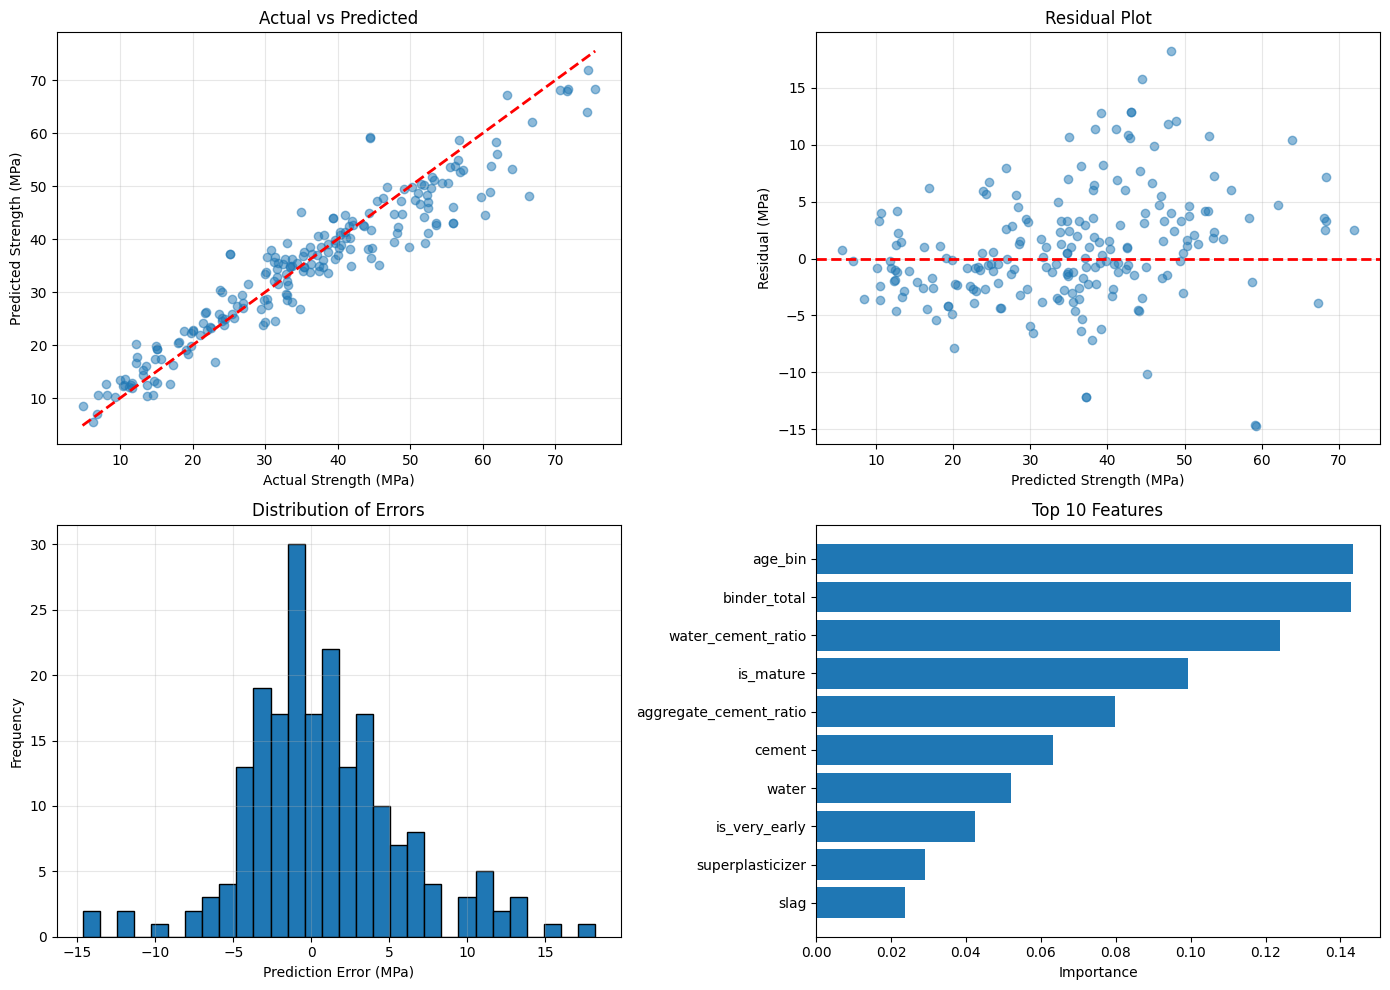


Visualizations complete


In [68]:
#Create predictions dataframe
predictions_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_test_pred,
    'Error': y_test.values - y_test_pred,
    'Absolute_Error': np.abs(y_test.values - y_test_pred),
    'Percentage_Error': np.abs(y_test.values - y_test_pred) / y_test.values * 100
})

print("\n" + "="*70)
print("PREDICTION ANALYSIS")
print("="*70)
print(f"Mean prediction error: {predictions_df['Error'].mean():.4f} MPa")
print(f"Std dev of errors: {predictions_df['Error'].std():.4f} MPa")
print(f"Mean absolute % error: {predictions_df['Percentage_Error'].mean():.2f}%")

#Save predictions
#predictions_df.to_csv('rf_predictions.csv', index=False)

#Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#Actual vs Predicted
axes[0, 0].scatter(y_test, y_test_pred, alpha=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Strength (MPa)')
axes[0, 0].set_ylabel('Predicted Strength (MPa)')
axes[0, 0].set_title('Actual vs Predicted')
axes[0, 0].grid(alpha=0.3)

#Residuals
axes[0, 1].scatter(y_test_pred, predictions_df['Error'], alpha=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Strength (MPa)')
axes[0, 1].set_ylabel('Residual (MPa)')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(alpha=0.3)

#Error distribution
axes[1, 0].hist(predictions_df['Error'], bins=30, edgecolor='black')
axes[1, 0].set_xlabel('Prediction Error (MPa)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Errors')
axes[1, 0].grid(alpha=0.3)

#Top 10 features
top_features = feature_importance.head(10)
axes[1, 1].barh(top_features['Feature'], top_features['Importance'])
axes[1, 1].set_xlabel('Importance')
axes[1, 1].set_title('Top 10 Features')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\nVisualizations complete")
